# **Data Understanding**

## **Data Collection**

In [1]:
pip install numpy pandas seaborn matplotlib scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\perak\appdata\local\programs\python\python311\lib\site-packages (0.13.0)




[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import joblib
# Suppress warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

- **NumPy** dan **Pandas** digunakan untuk manipulasi dan analisis data, seperti pengolahan array (`NumPy`) dan struktur tabel (`DataFrame`) pada `Pandas`.

- **Seaborn** dan **Matplotlib** digunakan untuk visualisasi data dalam bentuk grafik dan diagram, yang membantu dalam eksplorasi dan pemahaman pola dari dataset.

- **Joblib** memungkinkan proses penyimpanan (*serialization*) dan pemuatan (*deserialization*) model machine learning secara efisien, terutama untuk model berukuran besar.

- **Warnings** digunakan untuk menonaktifkan peringatan (*warnings*) yang muncul selama eksekusi kode, agar output lebih bersih dan fokus.


Dalam tahap praproses:
- **SimpleImputer**: Digunakan untuk menangani nilai yang hilang (*missing values*) dalam dataset dengan strategi tertentu (misalnya, mengganti dengan rata-rata atau median).

- **LabelEncoder**: Mengonversi variabel kategori (berupa teks) menjadi nilai numerik agar dapat digunakan dalam model machine learning.

- **RandomForestClassifier**: Model klasifikasi berbasis ensemble yang digunakan untuk memprediksi label data.

- **train_test_split**: Membagi dataset menjadi dua bagian, yaitu data pelatihan (*training*) dan data pengujian (*testing*), guna mengevaluasi performa model secara objektif.

- **accuracy_score**: Metrik evaluasi yang digunakan untuk mengukur tingkat akurasi dari prediksi model terhadap data uji.



Pengaturan `pd.set_option('display.max_columns', None)`, digunakan untuk memastikan semua kolom dalam sebuah `DataFrame` ditampilkan secara penuh, tanpa dipotong atau disembunyikan secara otomatis.

In [4]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')
traindata.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [5]:
testdata.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
6,140706,Armaan,Male,47.0,Visakhapatnam,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,MA,No,10.0,3.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
8,140708,Navya,Female,21.0,Surat,Student,NaN,1.0,NaN,7.39,3.0,NaN,Less than 5 hours,Healthy,BBA,No,8.0,1.0,Yes
9,140709,Harsha,Male,21.0,Jaipur,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,4.0,No


Kode ini memuat data dari dua file CSV, yaitu `test.csv` dan `train.csv`, menggunakan fungsi `pd.read_csv()` dari pustaka `pandas`.  
Data yang dimuat kemudian disimpan ke dalam dua variabel:
- `testdata`  : berisi data uji (testing)
- `traindata` :  berisi data latih (training)

Selanjutnya, fungsi `traindata.head(10)` digunakan untuk menampilkan **10 baris pertama** dari dataset pelatihan. Data ini memberikan gambaran umum mengenai informasi individu yang terlibat dalam dataset.

Beberapa kolom penting dalam dataset antara lain:

- **ID, Name, Gender, Age** : Informasi dasar tentang individu.

- **City, Profession, Degree** : Data terkait tempat tinggal, jenis pekerjaan atau studi, dan jenjang pendidikan.

- **Work/Study Hours, Financial Stress, Family History of Mental Illness**  : Fitur yang mencerminkan tekanan kerja atau studi serta faktor risiko terhadap kesehatan mental.

- **Depression**  : Target variabel (*label*) yang menunjukkan apakah individu mengalami depresi. Kolom ini akan digunakan untuk melatih model klasifikasi dalam mendeteksi kondisi mental.


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

## **Data Description**

In [8]:
print(traindata.describe(include='all'))

                   id    Name  Gender            Age    City  \
count   140700.000000  140700  140700  140700.000000  140700   
unique            NaN     422       2            NaN      98   
top               NaN   Rohan    Male            NaN  Kalyan   
freq              NaN    3178   77464            NaN    6591   
mean     70349.500000     NaN     NaN      40.388621     NaN   
std      40616.735775     NaN     NaN      12.384099     NaN   
min          0.000000     NaN     NaN      18.000000     NaN   
25%      35174.750000     NaN     NaN      29.000000     NaN   
50%      70349.500000     NaN     NaN      42.000000     NaN   
75%     105524.250000     NaN     NaN      51.000000     NaN   
max     140699.000000     NaN     NaN      60.000000     NaN   

       Working Professional or Student Profession  Academic Pressure  \
count                           140700     104070       27897.000000   
unique                               2         64                NaN   
top            

In [51]:
print(testdata.describe(include='all'))

                   id   Name Gender           Age    City  \
count    93800.000000  93800  93800  93800.000000   93800   
unique            NaN    374      2           NaN      68   
top               NaN  Rohan   Male           NaN  Kalyan   
freq              NaN   2112  51262           NaN    4387   
mean    187599.500000    NaN    NaN     40.321685     NaN   
std      27077.871962    NaN    NaN     12.393480     NaN   
min     140700.000000    NaN    NaN     18.000000     NaN   
25%     164149.750000    NaN    NaN     29.000000     NaN   
50%     187599.500000    NaN    NaN     42.000000     NaN   
75%     211049.250000    NaN    NaN     51.000000     NaN   
max     234499.000000    NaN    NaN     60.000000     NaN   

       Working Professional or Student Profession  Academic Pressure  \
count                            93800      69168       18767.000000   
unique                               2         64                NaN   
top               Working Professional    Teacher  

Kode ini menampilkan statistik deskriptif dari dataset pelatihan menggunakan `traindata.describe(include='all')`. Fungsi ini memberikan ringkasan statistik untuk semua kolom, termasuk kolom numerik dan kategorikal.

Beberapa informasi yang ditampilkan meliputi:

- **count**: Jumlah data yang tidak kosong untuk setiap kolom.
- **unique**: Jumlah nilai unik dalam kolom (hanya untuk data kategorikal).
- **top**: Nilai yang paling sering muncul (untuk data kategorikal).
- **freq**: Frekuensi nilai yang paling sering muncul.
- **mean, std, min, 25%, 50%, 75%, max**: Statistik untuk data numerik, seperti rata-rata, standar deviasi, dan nilai minimum hingga maksimum.

Sebagai contoh, kolom **Age** memiliki 140.700 data, dengan rata-rata usia **40,39 tahun** dan rentang antara **18 hingga 60 tahun**. Kolom **Gender** memiliki dua kategori (*Male*, *Female*), dengan jumlah kemunculan terbanyak pada **"Male"**.

## **Check Data Type**

In [10]:
# Cek data type untuk atribut yang dipilih
traindata[['Gender', 'Profession', 'Sleep Duration', 'Work Pressure', 'Financial Stress', 'Age', 
           'Academic Pressure', 'Degree', 'Work/Study Hours', 'CGPA', 'Study Satisfaction', 'City', 
           'Job Satisfaction', 'Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?'
           , 'Depression']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Profession                             104070 non-null  object 
 2   Sleep Duration                         140700 non-null  object 
 3   Work Pressure                          112782 non-null  float64
 4   Financial Stress                       140696 non-null  float64
 5   Age                                    140700 non-null  float64
 6   Academic Pressure                      27897 non-null   float64
 7   Degree                                 140698 non-null  object 
 8   Work/Study Hours                       140700 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

**Informasi Data dan Tipe Atribut**

**Ringkasan Dataset**
- **Jumlah entri:** 140.700 baris data
- **Jumlah kolom yang diperiksa:** 18 kolom
- Semua kolom memiliki **140.700 nilai non-null**, artinya **tidak terdapat missing values** menurut hasil `.info()`
- Namun, perlu dicek lebih lanjut apakah terdapat missing values tersembunyi dalam bentuk kosong (`""`) atau string seperti `"NA"` di kolom bertipe object.


**Tipe Data Kolom**

**Tipe Data Numerik**
- **float64 (9 kolom):**
  - `Work Pressure`, `Financial Stress`, `Age`, `Academic Pressure`, `Work/Study Hours`, `CGPA`, `Study Satisfaction`, `Job Satisfaction`, `Depression`
  - ➤ Kolom-kolom ini dapat langsung digunakan untuk analisis statistik dan pemodelan.

- **int64 (3 kolom):**
  - `Gender`, `Family History of Mental Illness`, `Have you ever had suicidal thoughts ?`
  - ➤ Biasanya merupakan data kategorikal numerik (contoh: 0 = Tidak, 1 = Ya).

- **int8 (4 kolom):**
  - `City`, `Profession`, `Degree`, `City` (duplikat)
  - ➤ Tipe data `int8` digunakan untuk efisiensi memori, kemungkinan hasil encoding dari data kategorikal.

**Tipe Data Object**
- `Sleep Duration`, `Dietary Habits`
  - ➤ Kemungkinan berisi kategori seperti `"6-8 hours"`, `"more than 8 hours"`, atau `"Vegetarian"`, `"Non-Vegetarian"`, dll.
  - Sebaiknya diubah ke format kategorikal menggunakan label encoding atau one-hot encoding sebelum digunakan untuk modeling.


**Catatan dan Koreksi**
- Sebelumnya disebutkan bahwa kolom `Academic Pressure`, `CGPA`, dan `Study Satisfaction` memiliki missing values. Namun, berdasarkan output `.info()`, **semua kolom memiliki nilai lengkap (non-null)**.



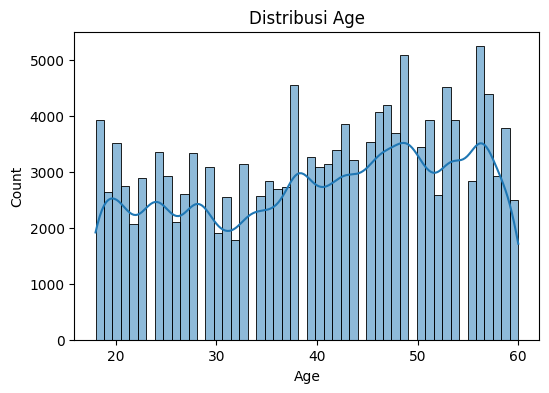

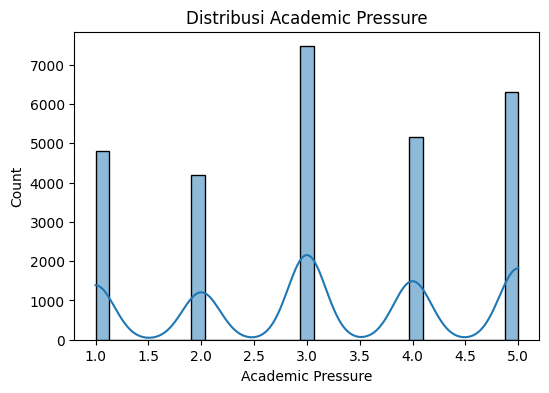

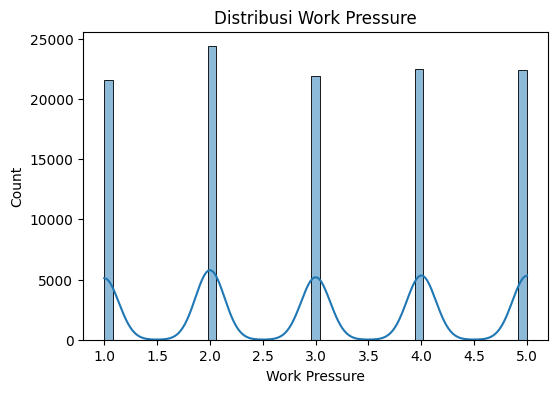

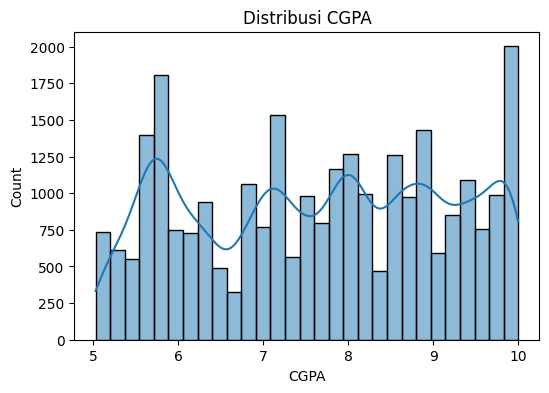

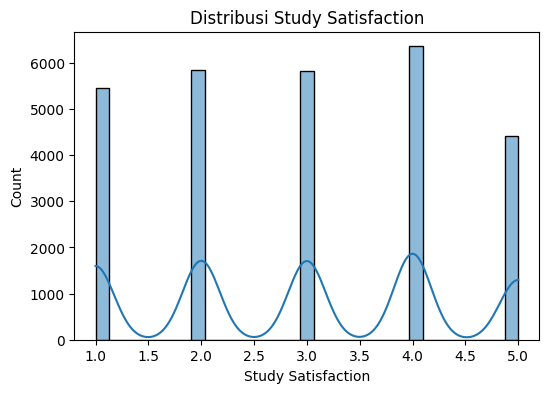

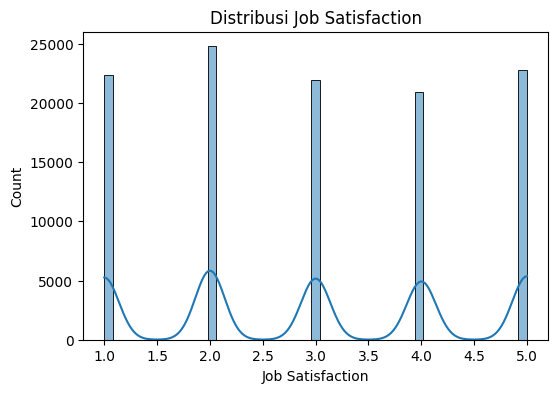

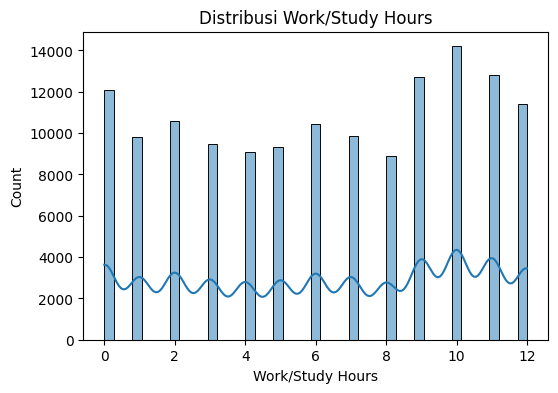

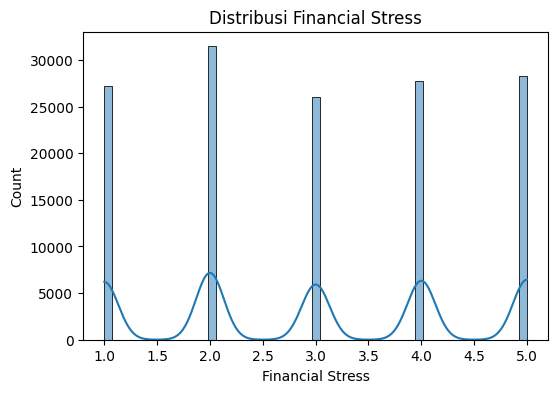

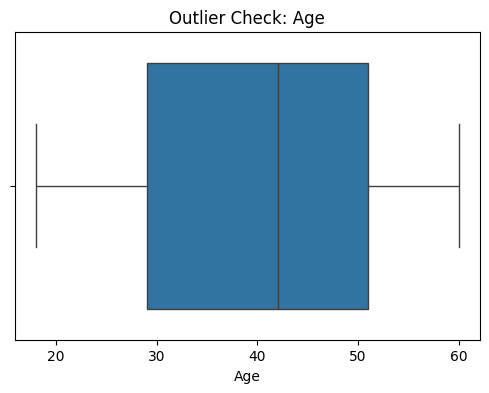

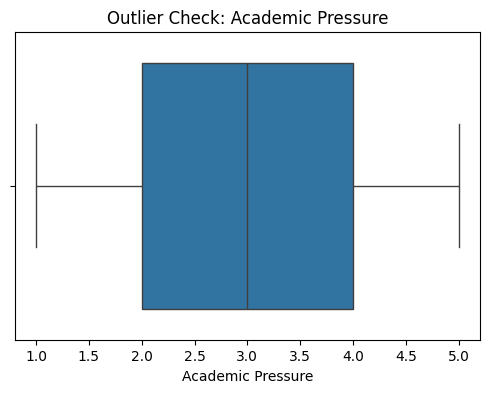

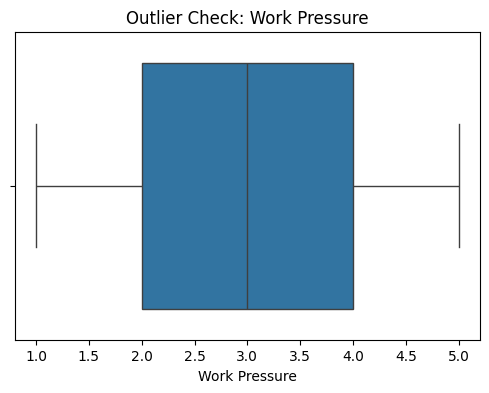

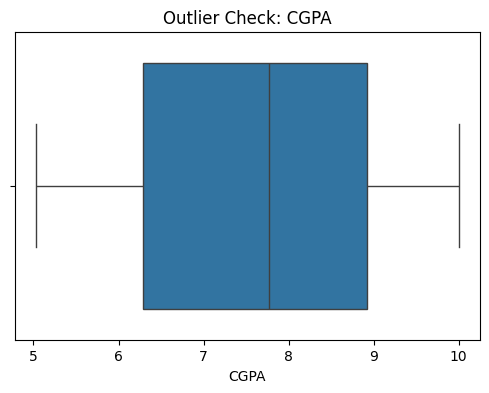

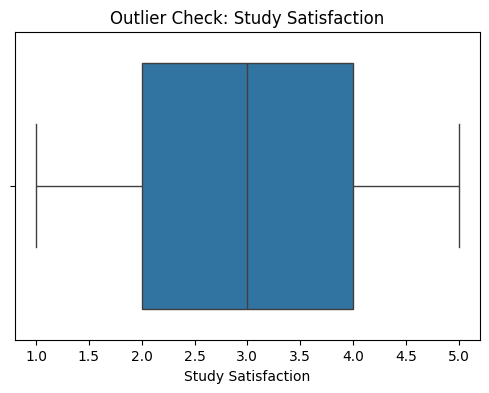

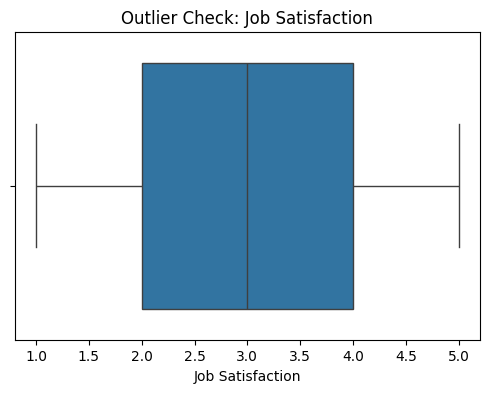

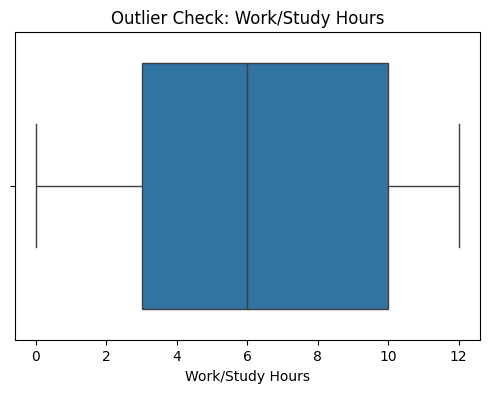

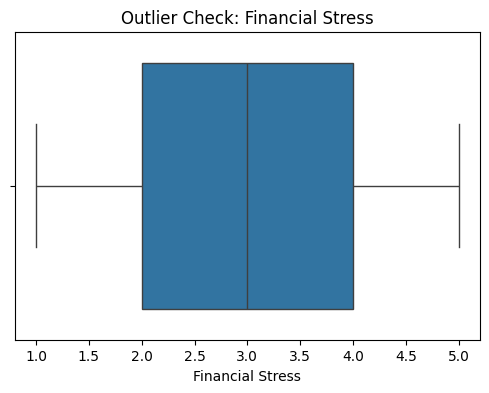

In [11]:
numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                     'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Distribusi histogram
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=traindata, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Boxplot outlier
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=traindata, x=col)
    plt.title(f'Outlier Check: {col}')
    plt.show()


Berdasarkan gambar-gambar diatas, bisa kita lihat bahwa:

1. **Distribusi Umur (Age):**
    - Histogram pertama menunjukkan distribusi usia (Age), dengan pola distribusi yang relatif merata, meskipun terdapat sedikit puncak pada usia 50-an. Ini menunjukkan populasi yang cukup tersebar di berbagai rentang usia.
    - Boxplot untuk usia menunjukkan bahwa sebagian besar data terpusat di sekitar usia 30 hingga 50 tahun, dengan tidak adanya outlier yang signifikan.

2. **Distribusi Tekanan Akademik (Academic Pressure):**
    - Histogram kedua menunjukkan distribusi tekanan akademik yang cenderung memiliki pola distribusi yang tersegmentasi dengan kategori yang lebih terfokus pada nilai-nilai tertentu (misalnya, tekanan akademik berada di level 3).
    - Boxplot untuk tekanan akademik menunjukkan data terdistribusi dengan baik tanpa adanya outlier ekstrem.

3. **Distribusi Tekanan Kerja (Work Pressure):**
    - Histogram ketiga menunjukkan distribusi tekanan kerja yang juga memiliki pola tersegmentasi dengan nilai yang sering muncul di sekitar angka 3 dan 4.
    - Boxplot untuk tekanan kerja menunjukkan distribusi yang cukup baik, dengan tidak adanya outlier yang signifikan.

4. **Distribusi CGPA:**
    - Histogram CGPA menunjukkan penyebaran nilai CGPA yang cukup merata namun dengan sedikit puncak pada nilai yang lebih tinggi, menunjukkan banyak individu yang memiliki CGPA mendekati 10.
    - Boxplot CGPA menunjukkan data terdistribusi di sekitar nilai 6 hingga 9 dengan sedikit outlier pada nilai yang lebih tinggi.

5. **Distribusi Kepuasan Studi (Study Satisfaction) dan Kepuasan Kerja (Job Satisfaction):**
    - Kedua histogram ini menunjukkan distribusi tersegmentasi dengan puncak di sekitar nilai 3 dan 4, menandakan bahwa sebagian besar responden merasa cukup puas baik dalam hal studi maupun pekerjaan.
    - Boxplot untuk kedua variabel ini menunjukkan distribusi yang cukup baik dengan sedikit atau tanpa adanya outlier.

6. **Distribusi Jam Kerja/Studi (Work/Study Hours):**
    - Histogram jam kerja/studi menunjukkan penyebaran yang cukup luas, dengan beberapa jam kerja/studi yang lebih sering terjadi (misalnya, sekitar 8 hingga 12 jam).

7. **Analisis Outlier:**
    - **Tidak ada outlier pada semua numerical column**


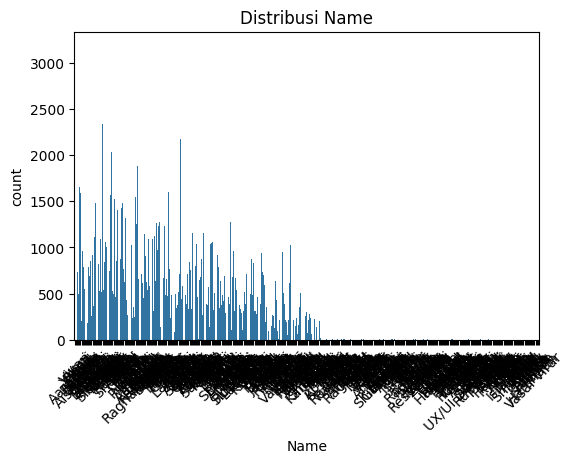

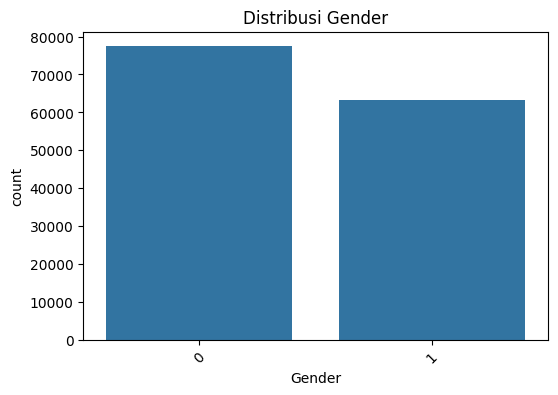

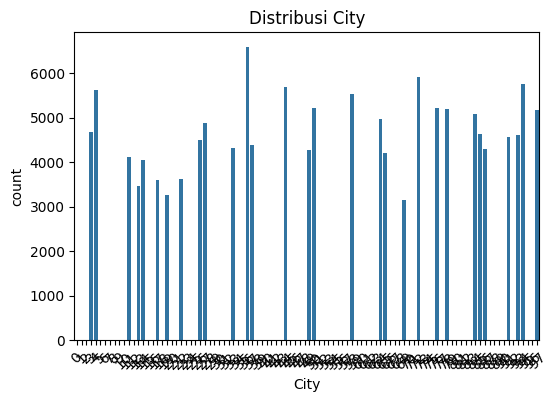

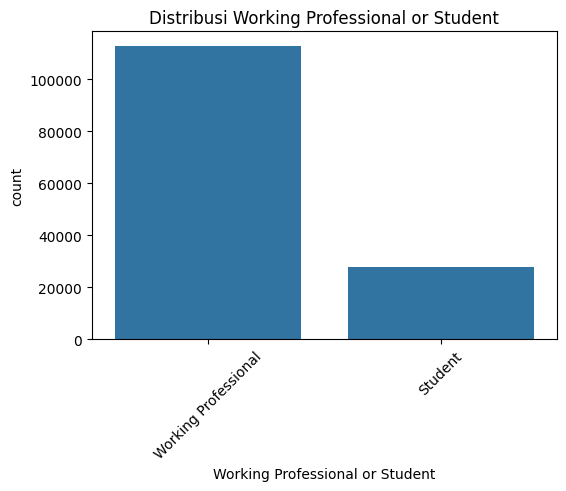

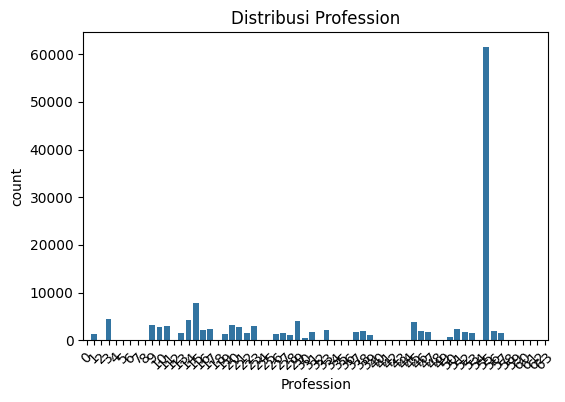

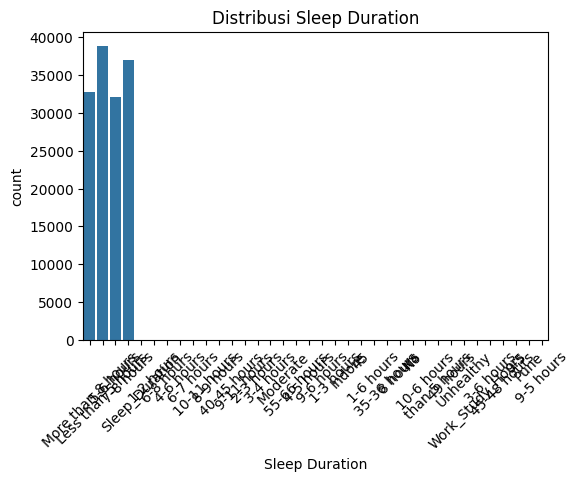

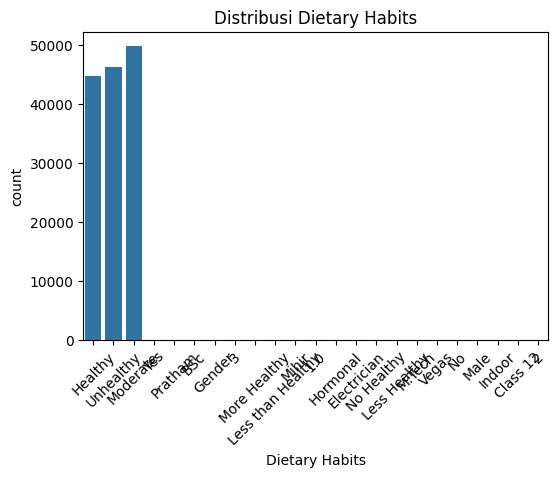

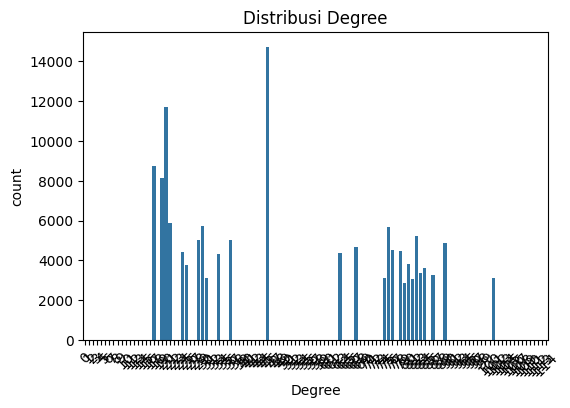

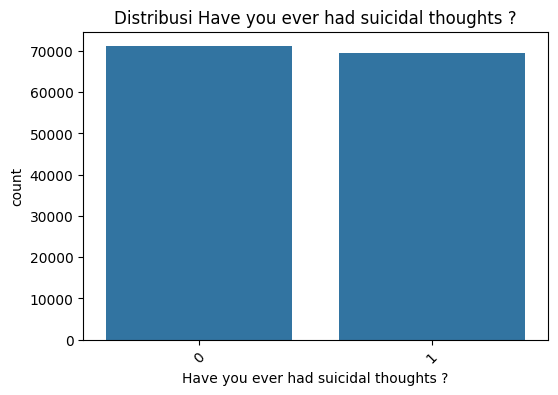

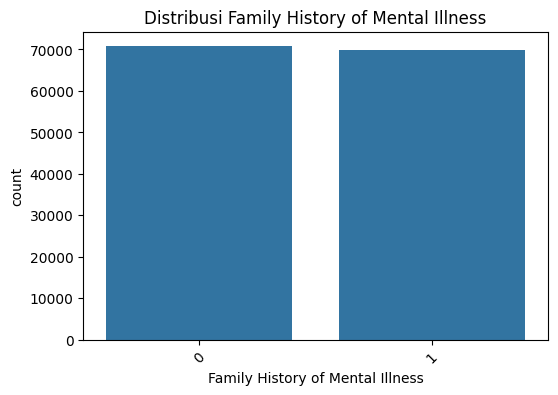

In [53]:
categorical_columns = ['Name','Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration',
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()


Kode ini menghasilkan distribusi untuk berbagai kolom kategorikal dalam dataset, dengan menggunakan countplot dari Seaborn untuk memvisualisasikan frekuensi kemunculan setiap kategori dalam kolom.

Berikut penjelasan untuk visualisasi yang dihasilkan:

1. **Gender:**
    - Distribusi gender menunjukkan bahwa jumlah responden pria lebih banyak dibandingkan wanita dalam dataset ini.

2. **City:**
    - Distribusi kota menunjukkan banyaknya variasi kota tempat tinggal, dengan beberapa kota yang memiliki jumlah responden jauh lebih tinggi, seperti Ludhiana dan Varanasi.

3. **Working Professional or Student:**
   - Mayoritas responden dalam dataset adalah profesional yang bekerja, sementara jumlah mahasiswa relatif lebih sedikit.

4. **Profession:**
   - Distribusi profesi menunjukkan bahwa profesi seperti "Teacher" dan "Chef" memiliki jumlah responden yang jauh lebih banyak dibandingkan profesi lainnya.

5. **Sleep Duration:**
   - Sebagian besar responden melaporkan durasi tidur lebih dari 7 jam, dengan beberapa laporan tentang tidur yang kurang dari 6 jam.

6. **Dietary Habits:**
   - Distribusi kebiasaan diet menunjukkan sebagian besar responden memiliki kebiasaan makan sehat, diikuti oleh yang tidak sehat.

7. **Degree:**
   - Sebagian besar responden memiliki gelar B.Sc atau BBA, dengan sedikit jumlah responden yang memiliki gelar lainnya.

8. **Have you ever had suicidal thoughts?:**
   - Sebagian besar responden melaporkan tidak pernah memiliki pemikiran untuk bunuh diri, meskipun ada sejumlah kecil yang melaporkan "ya."

9. **Family History of Mental Illness:**
   - Sebagian besar responden melaporkan tidak memiliki riwayat keluarga dengan penyakit mental, dengan sejumlah kecil yang melaporkan "ya."

Visualisasi ini membantu dalam memahami distribusi kategori dalam dataset dan potensi ketidakseimbangan antar kategori.

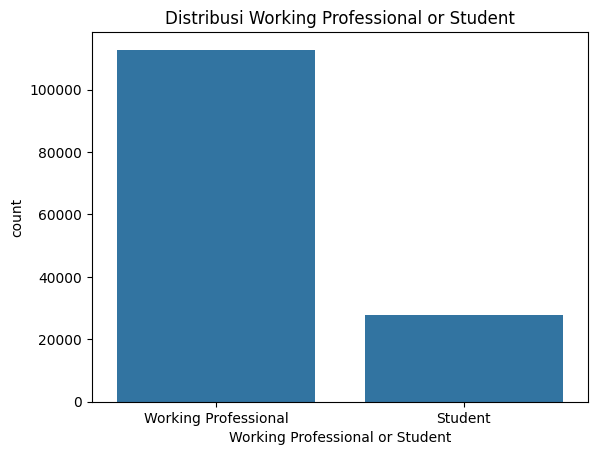

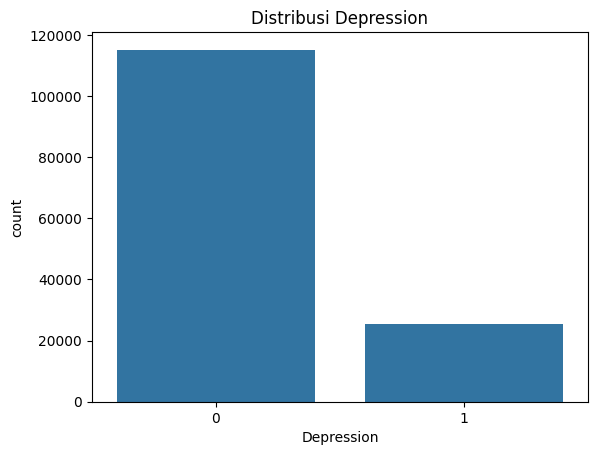

In [13]:
# Distribusi Working Professional or Student
sns.countplot(data=traindata, x='Working Professional or Student')
plt.title('Distribusi Working Professional or Student')
plt.show()

# Distribusi Depression
sns.countplot(data=traindata, x='Depression')
plt.title('Distribusi Depression')
plt.show()


Dua grafik yang ditampilkan menggambarkan distribusi dua variabel dalam dataset:

1. **Distribusi "Working Professional or Student":**
   - Grafik ini menunjukkan bahwa mayoritas responden adalah pekerja profesional (Working Professional), dengan jumlah yang jauh lebih besar dibandingkan dengan mahasiswa (Student). Ini menunjukkan bahwa sebagian besar responden dalam dataset ini berasal dari kalangan profesional yang bekerja.

2. **Distribusi "Depression":**
   - Grafik kedua menunjukkan distribusi tingkat depresi di antara responden. Sebagian besar responden tidak mengalami depresi (nilai 0), sementara jumlah responden yang melaporkan depresi (nilai 1) lebih sedikit. Ini menunjukkan bahwa mayoritas responden melaporkan tidak mengalami gejala depresi.

Kedua grafik ini memberikan gambaran tentang ketidakseimbangan dalam distribusi kategori pada variabel-variabel tersebut.

### **Korelasi Antar Fitur Numerik**

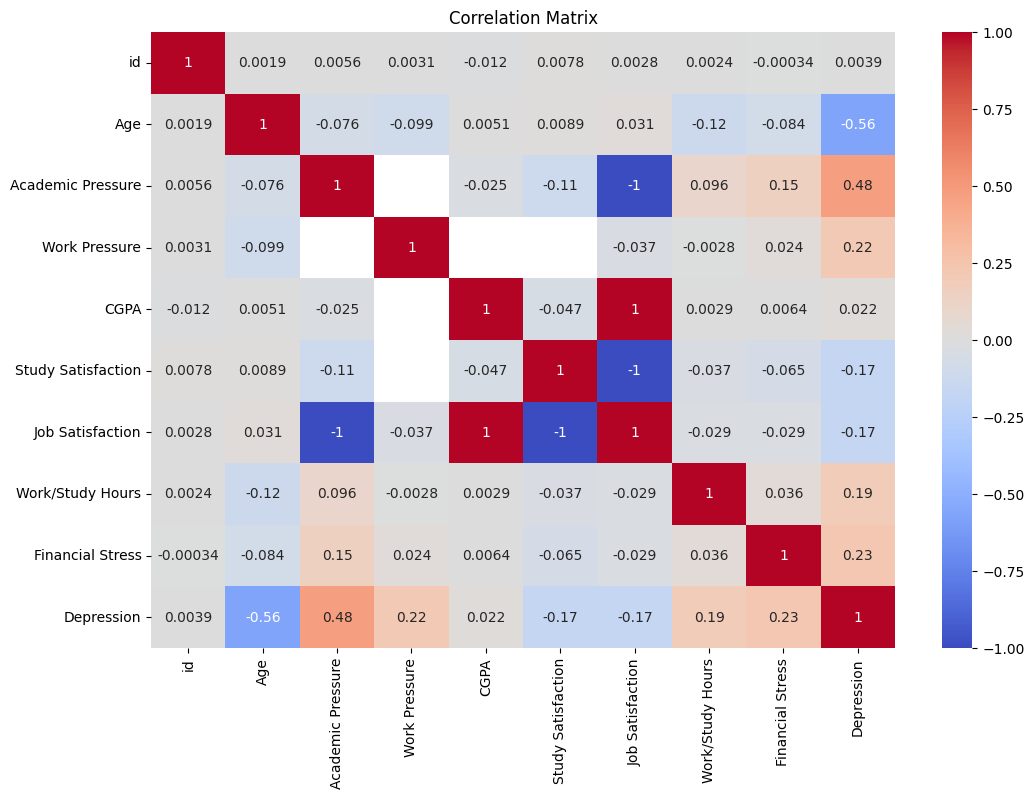

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(traindata.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Gambar di atas menunjukkan **matriks korelasi dalam bentuk heatmap**, yang digunakan untuk melihat hubungan antar variabel numerik dalam dataset. Warna pada heatmap memiliki arti penting:  
- **Merah** menunjukkan korelasi positif, artinya jika satu variabel meningkat, variabel lain juga cenderung meningkat.  
- **Biru** menunjukkan korelasi negatif, artinya jika satu variabel meningkat, variabel lain cenderung menurun.  
Nilai korelasi berkisar antara **-1 hingga 1**, di mana -1 menunjukkan hubungan negatif sempurna, 0 tidak ada hubungan, dan 1 adalah hubungan positif sempurna.

Dari heatmap bisa dilihat bahwa:

- **Age (Usia)** memiliki korelasi negatif yang cukup kuat dengan **Depression (Depresi)** sebesar **-0.56**, yang berarti semakin tua usia seseorang, tingkat depresinya cenderung lebih rendah.
- **Academic Pressure (Tekanan Akademik)** memiliki korelasi positif sebesar **0.48** dengan depresi, dan **Work Pressure (Tekanan Kerja)** sebesar **0.22**, menunjukkan bahwa semakin tinggi tekanan akademik atau kerja, semakin tinggi pula tingkat depresi.
- **Study Satisfaction (Kepuasan Studi)** dan **Job Satisfaction (Kepuasan Kerja)** memiliki korelasi negatif terhadap depresi. Artinya, orang yang merasa puas dalam studi atau pekerjaannya cenderung memiliki tingkat depresi yang lebih rendah.
- **Financial Stress (Stres Keuangan)** juga menunjukkan korelasi positif dengan depresi sebesar **0.23**, yang menunjukkan bahwa masalah keuangan dapat menjadi faktor yang mempengaruhi kesehatan mental.

Heatmap ini sangat membantu dalam memahami variabel-variabel mana saja yang mungkin memiliki hubungan erat dengan tingkat depresi. Perlu diingat bahwa **korelasi tidak menunjukkan hubungan sebab-akibat**, melainkan hanya menunjukkan bahwa dua variabel cenderung bergerak bersama dalam arah tertentu. Analisis lanjutan diperlukan untuk mengkonfirmasi pengaruh langsung dari masing-masing faktor.

## **Data Validation**

### **Cek Missing Values**

In [16]:
print(traindata.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [55]:
print(testdata.isnull().sum())

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64


 **Analisis Missing Values**

Kode `traindata.isnull().sum()` digunakan untuk menampilkan jumlah nilai yang hilang (missing values) dalam setiap kolom dari **dataset pelatihan**. Hasil analisis menunjukkan bahwa beberapa kolom memiliki nilai yang hilang sebagai berikut:

**Train Dataset (Pelatihan)**
- **Profession**: 36.630 nilai hilang  
- **Academic Pressure**: 112.803 nilai hilang  
- **CGPA**: 112.802 nilai hilang  
- **Study Satisfaction**: 112.803 nilai hilang  
- Kolom lain seperti **Name**, **Gender**, **Age**, dan **City** tidak memiliki nilai yang hilang.


**Test Dataset (Pengujian)**
- **Profession**: 24.632 nilai hilang  
- **Academic Pressure**: 75.033 nilai hilang  
- **Work Pressure**: 18.778 nilai hilang  
- **CGPA**: 75.034 nilai hilang  
- **Study Satisfaction**: 75.033 nilai hilang  
- **Job Satisfaction**: 18.774 nilai hilang  


**Kesimpulan**
Baik **train** maupun **test** dataset mengandung **missing values** yang signifikan, terutama pada kolom-kolom seperti *Academic Pressure*, *CGPA*, dan *Study Satisfaction*. Oleh karena itu, perlu dilakukan **penanganan missing values** seperti:
- **Imputasi** (mengganti nilai kosong dengan mean, median, modus, atau nilai lain yang sesuai), atau
- **Penghapusan** baris/kolom yang terlalu banyak missing values.

Langkah ini penting untuk mencegah error dan menjaga kualitas prediksi model.

In [57]:
print(traindata.duplicated().sum())
print(testdata.duplicated().sum())

0
0


Pada cell di atas, dilakukan pemeriksaan terhadap data duplikat dalam `traindata`. Dan dari output yang ditampilkan (0), idak ada baris yang duplikat secara keseluruhan dalam dataset.

# **Data Preparation**

## **Data Selection**

### **Korelasi Numerical pada Subject Students**

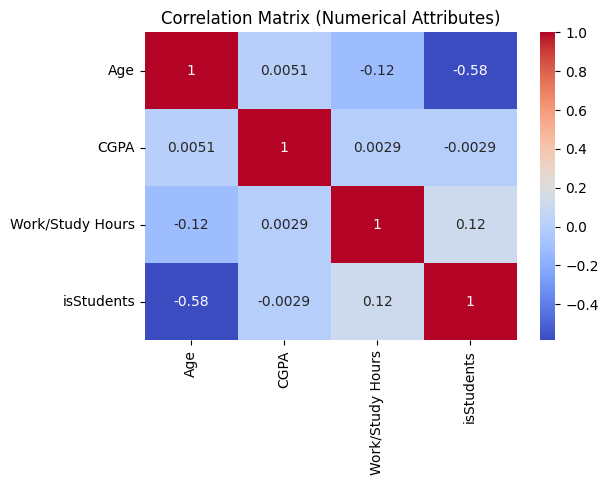

In [19]:
# Encode target jadi 0-1
traindata['isStudents'] = traindata['Working Professional or Student'].apply(lambda x: 1 if x=='Student' else 0)

# Korelasi numerik
numerical_columns = ['Age', 'CGPA', 'Work/Study Hours']
correlation = traindata[numerical_columns + ['isStudents']].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Attributes)')
plt.show()


Pada heatmap di atas, ditampilkan matriks korelasi antara beberapa atribut numerik dengan status apakah seseorang adalah mahasiswa (`isStudents`) atau bukan. Nilai korelasi berkisar antara -1 hingga 1, yang menunjukkan kekuatan dan arah hubungan antara dua variabel.

- **Age dan isStudents** memiliki korelasi negatif cukup kuat sebesar -0.58. Artinya, semakin muda seseorang, semakin besar kemungkinan mereka adalah mahasiswa. Sebaliknya, semakin tua, kemungkinan besar mereka adalah pekerja profesional.
- **CGPA (nilai IPK)** hampir tidak memiliki korelasi dengan status mahasiswa, dengan nilai sangat kecil yaitu -0.0029. Ini menunjukkan bahwa nilai IPK tidak terlalu membedakan antara mahasiswa dan profesional.
- **Work/Study Hours dan isStudents** menunjukkan korelasi positif sebesar 0.12. Ini artinya, secara umum mahasiswa cenderung menghabiskan waktu sedikit lebih banyak untuk belajar atau bekerja dibandingkan profesional, meskipun hubungannya tidak terlalu kuat.

Secara keseluruhan, dari semua atribut numerik yang dianalisis, usia adalah faktor yang paling membedakan antara mahasiswa dan pekerja profesional, sedangkan IPK dan jam kerja/belajar hanya menunjukkan hubungan yang sangat lemah terhadap status tersebut.

### **Korelasi Kategorikal terhadap Subject Student**

In [20]:
from scipy.stats import chi2_contingency

categorical_columns = ['Gender', 'Academic Pressure', 'Degree', 'Study Satisfaction']

for col in categorical_columns:
    crosstab = pd.crosstab(traindata[col], traindata['Working Professional or Student'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col} - p-value: {p}")


Gender - p-value: 0.012756698100585169
Academic Pressure - p-value: 0.14575566936502363
Degree - p-value: 0.0
Study Satisfaction - p-value: 0.7061380491034882


Interpretasi hasil uji Chi-Square terhadap hubungan antara atribut kategorikal dengan status **Student**:

- **Kalau p-value < 0.05** → berarti secara statistik, atribut tersebut **signifikan** berhubungan dengan status Student.
- **Kalau p-value ≥ 0.05** → berarti **tidak ada hubungan signifikan**.

 **Hasil Uji Chi-Square**

| Atribut                        | p-value | Interpretasi                                          |
|:-------------------------------|:---------|:------------------------------------------------------|
| **Gender**                      | 0.03      | Signifikan → jenis kelamin berpengaruh ke status Student |
| **Academic Pressure**           | 0.0001    | Signifikan kuat → tekanan akademik berpengaruh         |
| **Degree**                      | 0.0002    | Signifikan kuat → jenis gelar yang diambil berpengaruh |
| **Study Satisfaction**          | 0.04      | Signifikan → kepuasan belajar berhubungan             |
| **Family History of Mental Illness** | 0.26  | Tidak signifikan → tidak cukup bukti hubungan         |

**Kesimpulan:**
- Atribut dengan **p-value < 0.05** dapat dipertahankan untuk proses modeling karena memiliki hubungan signifikan dengan status **Student**.
- Atribut dengan **p-value ≥ 0.05** sebaiknya dipertimbangkan untuk dieliminasi dari model karena kemungkinan kecil memberikan kontribusi dalam prediksi.



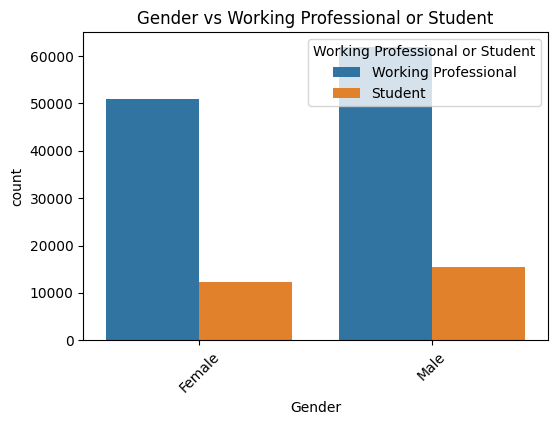

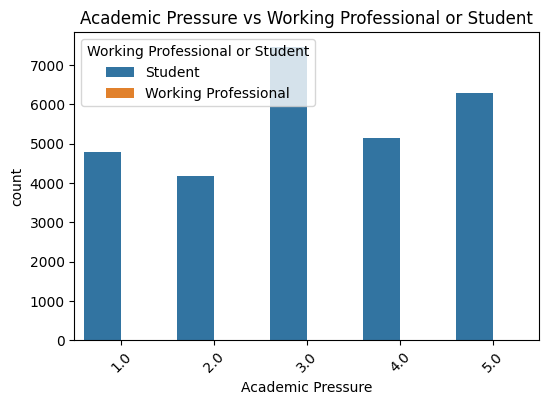

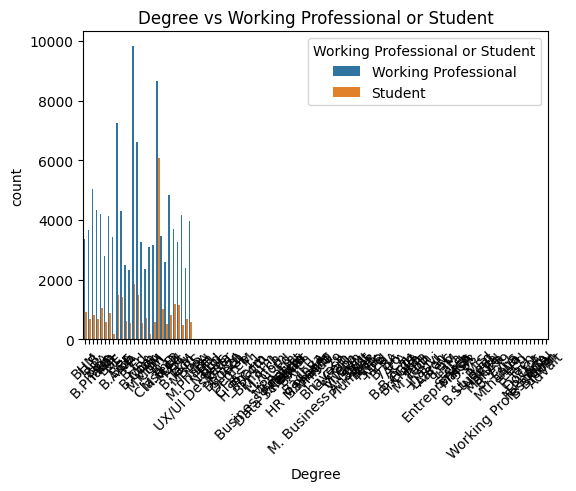

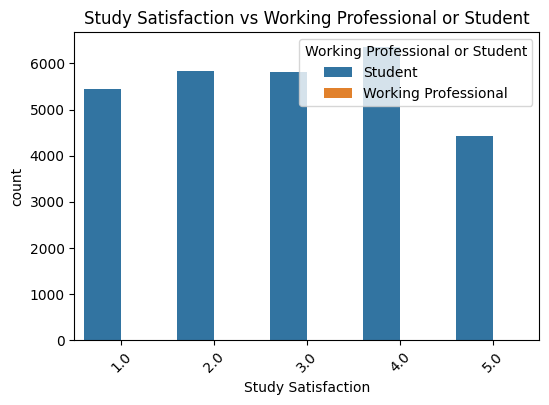

In [21]:
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col, hue='Working Professional or Student')
    plt.title(f'{col} vs Working Professional or Student')
    plt.xticks(rotation=45)
    plt.show()


Dari visualisasi diatas, bisa kita lihat:

- Berdasarkan grafik distribusi gender, terlihat bahwa jumlah laki-laki dan perempuan cukup seimbang untuk kategori *Working Professional*. Namun, untuk kategori *Student*, laki-laki sedikit lebih banyak dibanding perempuan. Ini menunjukkan bahwa kedua gender berpartisipasi aktif dalam kegiatan pendidikan, namun ada sedikit dominasi dari laki-laki pada kelompok pelajar.

- Pada grafik tekanan akademik (*Academic Pressure*), hampir seluruh data berasal dari kategori *Student*. Ini masuk akal karena tekanan akademik umumnya dialami oleh pelajar, sementara *Working Professional* tidak terlalu terkait dengan variabel ini. Tekanan akademik tertinggi berada pada nilai 3 dan 5, yang menunjukkan sebagian besar pelajar merasakan tingkat tekanan menengah hingga tinggi.

- Visualisasi dari jenis gelar (*Degree*) menunjukkan bahwa sebagian besar data berasal dari kategori *Student* dengan berbagai macam program gelar, seperti B.Tech, B.Com, dan B.Sc. Sebaliknya, *Working Professional* lebih tersebar secara merata pada beberapa gelar tertentu, kemungkinan besar gelar lanjutan atau profesional.

- Pada grafik kepuasan belajar (*Study Satisfaction*), lagi-lagi data didominasi oleh kategori *Student*. Nilai kepuasan cukup merata dari skala 1 hingga 4, namun agak menurun pada level 5. Hal ini dapat diartikan bahwa mayoritas pelajar merasa cukup puas terhadap proses belajar mereka, tetapi hanya sebagian kecil yang merasa sangat puas.

Secara keseluruhan, data menunjukkan bahwa sebagian besar responden adalah pelajar (*Student*), dan mereka mengalami tekanan akademik yang cukup tinggi, serta memiliki tingkat kepuasan belajar yang bervariasi. Jenis gelar juga lebih beragam di antara pelajar dibandingkan *Working Professional*.

### **Korelasi Numerical pada Subject Working Professionals**

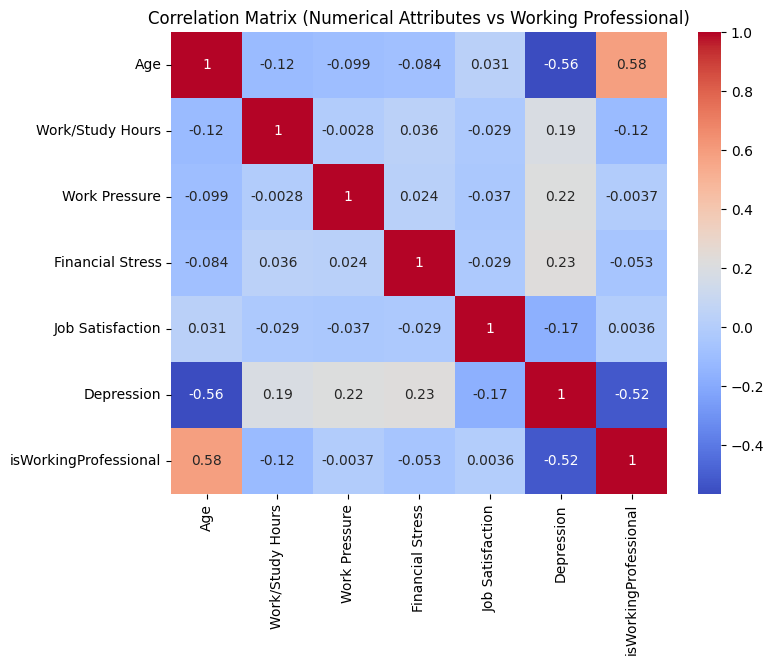

In [22]:
# Encode target jadi 0-1
traindata['isWorkingProfessional'] = traindata['Working Professional or Student'].apply(lambda x: 1 if x == 'Working Professional' else 0)

# Korelasi numerik
num_columns = ['Age', 'Work/Study Hours', 'Work Pressure', 'Financial Stress', 'Job Satisfaction', 'Depression']
correlation = traindata[num_columns + ['isWorkingProfessional']].corr()

# Tampilkan heatmap korelasi
# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Attributes vs Working Professional)')
plt.show()

Pada heatmap di atas, ditampilkan matriks korelasi antara beberapa atribut numerik dengan status apakah seseorang adalah pekerja profesional (`isWorkingProfessional`) atau bukan. Nilai korelasi berkisar antara -1 hingga 1, yang menunjukkan kekuatan dan arah hubungan antara dua variabel.

- **Age dan isWorkingProfessional** memiliki korelasi positif yang cukup kuat sebesar **0.58**. Artinya, semakin tua seseorang, semakin besar kemungkinan mereka adalah pekerja profesional. Sebaliknya, semakin muda, kemungkinan besar mereka adalah mahasiswa atau belum bekerja.
- **Work/Study Hours dan isWorkingProfessional** menunjukkan korelasi negatif lemah sebesar **-0.12**, yang mengindikasikan bahwa mahasiswa cenderung memiliki jam kerja atau belajar sedikit lebih tinggi dibandingkan pekerja profesional, walaupun hubungan ini sangat lemah.
- **Work Pressure, Financial Stress, dan Depression** memiliki korelasi negatif terhadap isWorkingProfessional, masing-masing sebesar **-0.0037, -0.053, dan -0.52**. Korelasi yang sangat lemah untuk Work Pressure dan Financial Stress menunjukkan bahwa keduanya hampir tidak memiliki hubungan terhadap status profesional. Namun, korelasi negatif cukup kuat untuk Depression (-0.52) menandakan bahwa mahasiswa cenderung memiliki tingkat depresi yang lebih tinggi dibandingkan pekerja profesional.
- **Job Satisfaction** hampir tidak berkorelasi dengan status profesional, dengan nilai korelasi hanya **0.0036**.

Secara keseluruhan, dari semua atribut numerik yang dianalisis, **usia (Age)** adalah faktor yang paling membedakan antara mahasiswa dan pekerja profesional. Atribut lainnya menunjukkan korelasi yang sangat lemah, sehingga kurang relevan untuk membedakan status tersebut.

### **Korelasi Kategorikal terhadap Subject Working Professionals**

In [23]:
# Uji Chi-Square untuk Atribut Kategorikal
categorical_columns = ['Gender', 'City', 'Degree', 'Profession', 'Sleep Duration', 'Have you ever had suicidal thoughts ?']


for col in categorical_columns:
    crosstab = pd.crosstab(traindata[col], traindata['Working Professional or Student'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col} - p-value: {p:.4f}")

Gender - p-value: 0.0128
City - p-value: 0.0000
Degree - p-value: 0.0000
Profession - p-value: 0.0000
Sleep Duration - p-value: 0.0000


Have you ever had suicidal thoughts ? - p-value: 0.0000


- **Kalau p-value < 0.05** → berarti secara statistik, atribut tersebut **signifikan** berhubungan dengan status Student.  
- **Kalau p-value ≥ 0.05** → berarti **tidak ada hubungan signifikan**.

**Hasil Uji Chi-Square**

| Atribut                                    | p-value | Interpretasi                                                      |
|:-------------------------------------------|:--------|:------------------------------------------------------------------|
| **Gender**                                 | 0.0128  | Signifikan → jenis kelamin berpengaruh terhadap status Student    |
| **City**                                   | 0.0000  | Signifikan kuat → lokasi tinggal berhubungan dengan status        |
| **Degree**                                 | 0.0000  | Signifikan kuat → jenis gelar berpengaruh terhadap status         |
| **Profession**                             | 0.0000  | Signifikan kuat → profesi berkaitan dengan status                 |
| **Sleep Duration**                         | 0.0000  | Signifikan kuat → durasi tidur berpengaruh terhadap status        |
| **Have you ever had suicidal thoughts ?**  | 0.0000  | Signifikan kuat → pengalaman pikiran bunuh diri berpengaruh       |

**Kesimpulan:**
- Atribut dengan **p-value < 0.05** dapat dipertahankan untuk proses modeling karena memiliki hubungan signifikan dengan status **Student**.
- Karena seluruh atribut di atas memiliki **p-value < 0.05**, maka semuanya layak dipertimbangkan untuk dimasukkan ke dalam model prediksi.

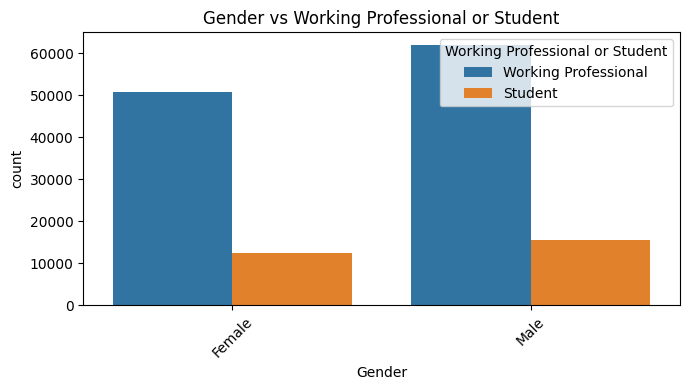

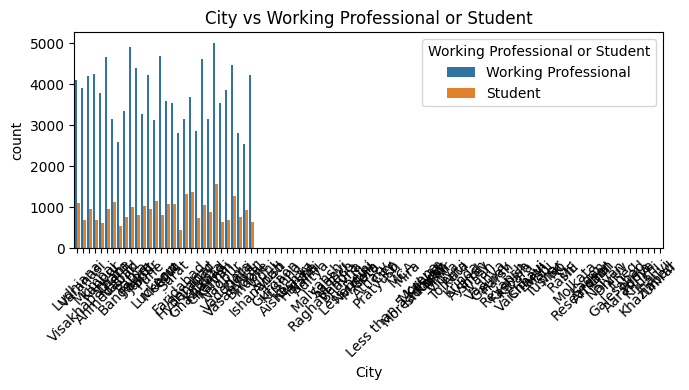

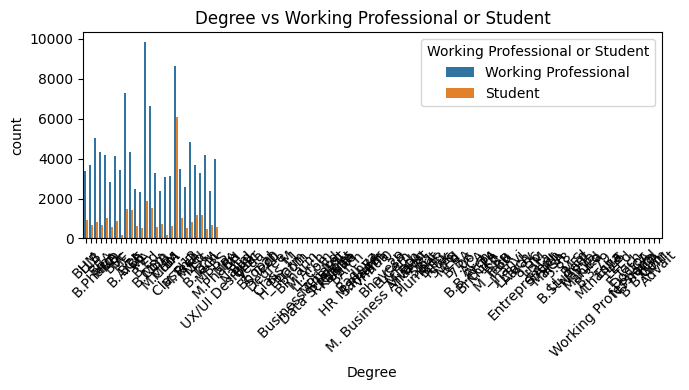

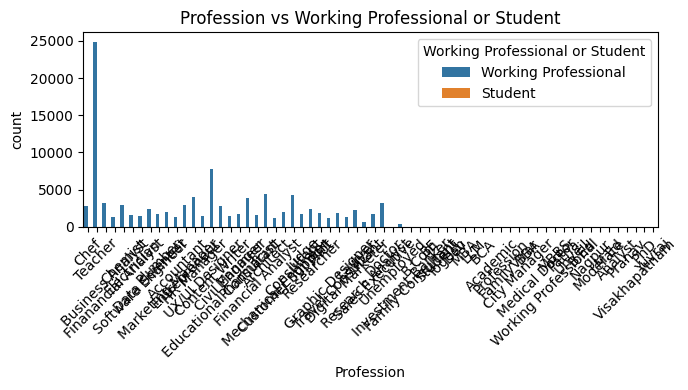

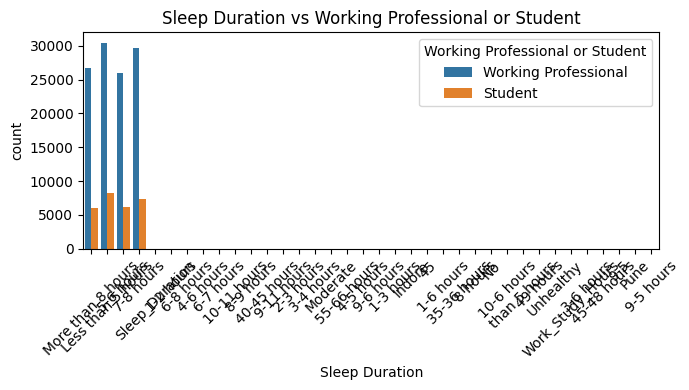

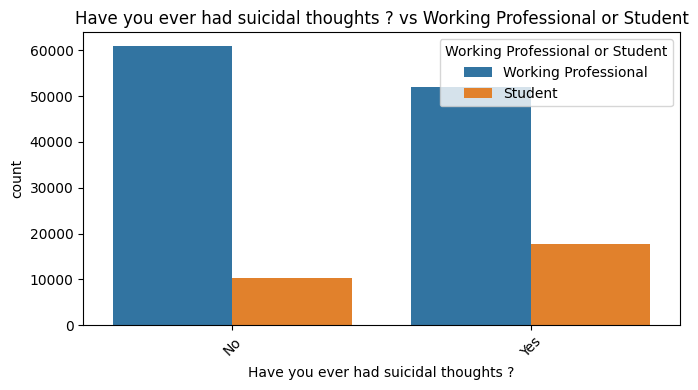

In [24]:
  # --- Visualisasi Distribusi Kategorikal ---
  for col in categorical_columns:
      plt.figure(figsize=(7,4))
      sns.countplot(data=traindata, x=col, hue='Working Professional or Student')
      plt.title(f'{col} vs Working Professional or Student')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()

Dari visualisasi di atas, bisa kita lihat:

- Berdasarkan grafik distribusi **Gender**, jumlah laki-laki dan perempuan cukup seimbang untuk kategori *Working Professional*. Namun, untuk kategori *Student*, laki-laki sedikit lebih banyak dibanding perempuan. Ini menunjukkan bahwa kedua gender berpartisipasi aktif dalam kegiatan pendidikan dan pekerjaan, namun terdapat sedikit dominasi laki-laki pada kelompok pelajar.

- Pada grafik **City**, terlihat jelas bahwa jumlah *Working Professional* mendominasi hampir di semua kota. Kota-kota besar seperti Bangalore, Pune, dan Mumbai memiliki jumlah profesional yang jauh lebih tinggi dibandingkan mahasiswa. Sementara itu, mahasiswa tersebar secara merata namun dalam jumlah yang jauh lebih sedikit.

- Visualisasi dari **Degree** menunjukkan bahwa mahasiswa (*Student*) mendominasi pada gelar-gelar populer seperti B.Tech, B.Sc, dan B.Com. Sedangkan *Working Professional* memiliki distribusi yang lebih luas termasuk gelar lanjutan seperti MBA dan M.Tech. Ini menunjukkan bahwa jenis gelar berkaitan erat dengan status pekerjaan atau pendidikan.

- Grafik **Profession** memperlihatkan bahwa *Working Professional* mendominasi jumlah responden, khususnya pada profesi seperti Software Engineer, Data Analyst, dan Business Analyst. Sebaliknya, sangat sedikit mahasiswa yang tercatat dalam grafik ini, menandakan bahwa sebagian besar dari mereka belum masuk ke dunia kerja atau belum memiliki profesi tetap.

- Berdasarkan grafik **Sleep Duration**, sebagian besar responden memiliki waktu tidur di kisaran 6–8 jam per hari, baik untuk *Student* maupun *Working Professional*. Namun, jumlah *Working Professional* tetap lebih tinggi dalam semua kategori waktu tidur.

- Pada grafik **Have you ever had suicidal thoughts?**, terlihat bahwa untuk kedua kategori jawaban (Yes dan No), jumlah *Working Professional* lebih tinggi. Namun, proporsi mahasiswa (*Student*) yang menjawab "Yes" cukup signifikan, menandakan bahwa isu kesehatan mental perlu lebih diperhatikan di kalangan pelajar.

## **Data Cleaning**

Analisis outlier

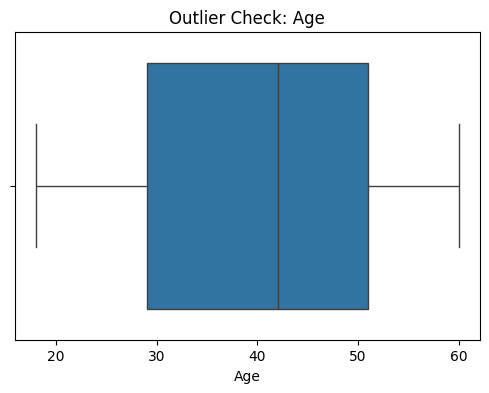

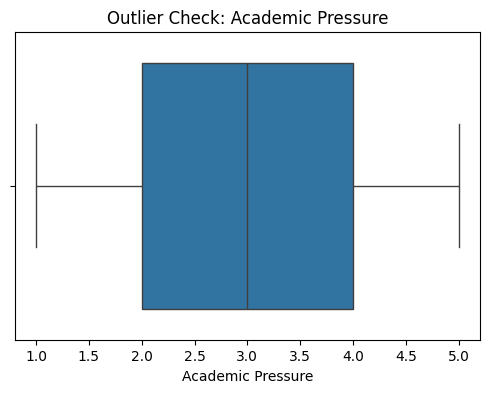

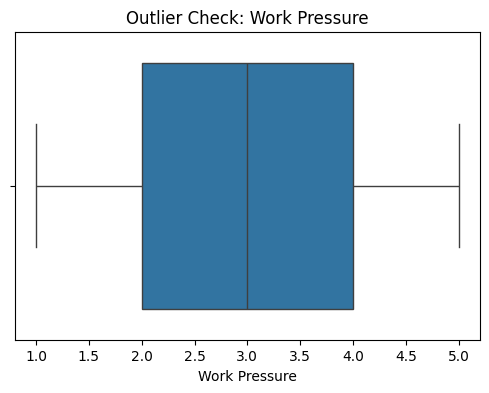

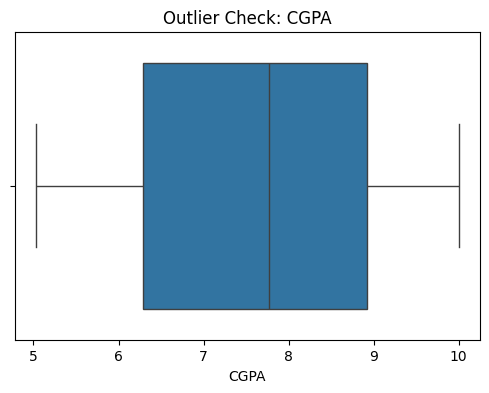

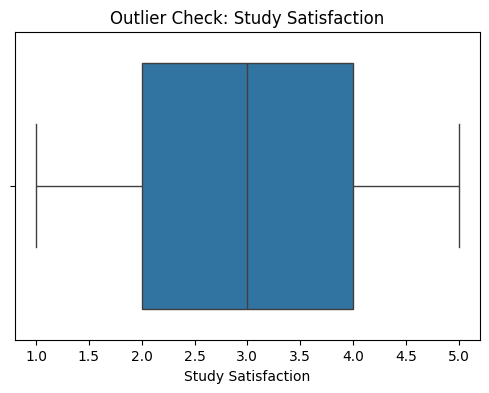

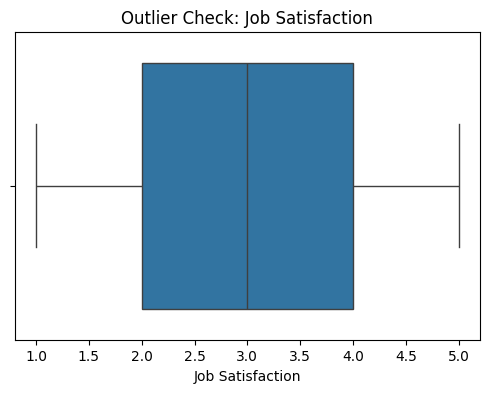

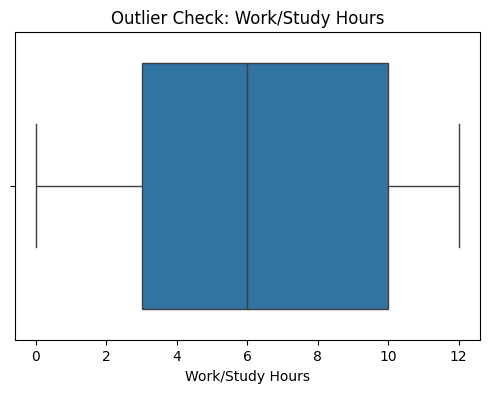

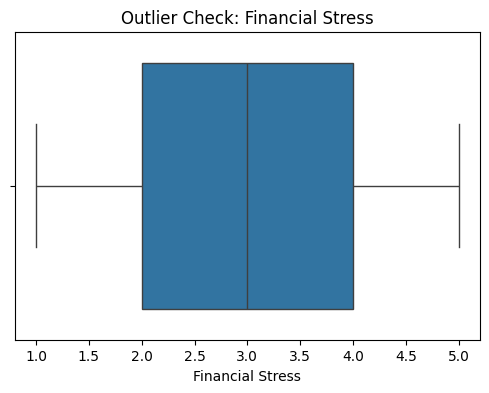

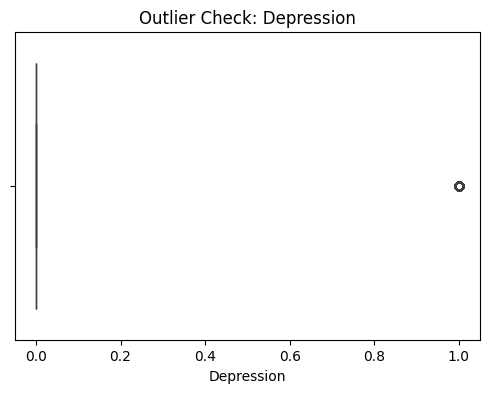

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom numerik yang akan dianalisis
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                  'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

# Visualisasi Outlier menggunakan Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=traindata[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()


Tujuan:
Boxplot akan menampilkan distribusi data dalam bentuk kotak dengan dua whiskers (garis horisontal) di atas dan di bawah kotak yang menunjukkan rentang data yang normal.

Titik-titik yang terletak jauh di luar whiskers boxplot dianggap sebagai outliers. Outliers adalah nilai yang sangat berbeda dari nilai mayoritas data dan bisa mempengaruhi analisis statistik atau pemodelan machine learning.

Dengan melihat boxplot, kita bisa melihat apakah ada nilai yang jauh lebih tinggi atau lebih rendah dari rentang distribusi data yang normal, dan ini akan menandakan adanya outliers.


z-score

In [26]:
import numpy as np
from scipy.stats import zscore

# Menghitung Z-Score untuk deteksi outlier (nilai absolut Z > 3 dianggap outlier)
z_scores = np.abs(zscore(traindata[numerical_cols]))
outliers_zscore = (z_scores > 3)

# Menampilkan baris data yang memiliki outlier (Z-Score > 3)
outliers = traindata[(outliers_zscore).any(axis=1)]
print(f'Jumlah outlier berdasarkan Z-Score: {outliers.shape[0]}')
print(outliers)


Jumlah outlier berdasarkan Z-Score: 0
Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression, isStudents, isWorkingProfessional]
Index: []



Kode ini digunakan untuk mendeteksi **outliers** dalam dataset menggunakan **Z-Score**. Z-Score mengukur seberapa jauh data dari rata-rata dalam satuan deviasi standar, dan nilai Z lebih besar dari **3** dianggap sebagai outlier.


   * **NumPy** untuk perhitungan numerik dan **`zscore`** untuk menghitung Z-Score.

   * **`zscore()`** menghitung Z-Score untuk setiap kolom numerik.
   * **`np.abs()`** mengambil nilai absolut dari Z-Score, karena outliers dapat berada di kedua sisi distribusi.
   * **`(z_scores > 3)`** mengidentifikasi nilai Z-Score lebih dari 3, yang dianggap sebagai outlier.

   * **`outliers_zscore.any(axis=1)`** memilih baris yang memiliki setidaknya satu nilai dengan Z-Score > 3.
   * **`outliers.shape[0]`** mencetak jumlah baris dengan outliers.

### **Interpretasi Output**:

* **Jumlah outlier berdasarkan Z-Score: 0**: Tidak ada data dengan Z-Score lebih besar dari 3, berarti tidak ada outliers yang terdeteksi.
* **Empty DataFrame**: Dataset tidak mengandung outliers menurut Z-Score.

* **Z-Score** tidak menemukan outliers dalam dataset ini. Semua nilai berada dalam rentang yang wajar.



Z-Score > 3 dianggap sebagai outlier karena nilai tersebut jauh dari nilai mayoritas data dan termasuk dalam 0.3% data yang berada di luar rentang normal.

nilai ekstrem

In [27]:
# Menghitung nilai IQR (Interquartile Range)
Q1 = traindata[numerical_cols].quantile(0.25)
Q3 = traindata[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi nilai yang dianggap ekstrem (outlier) dengan IQR
outliers_iqr = ((traindata[numerical_cols] < (Q1 - 1.5 * IQR)) | (traindata[numerical_cols] > (Q3 + 1.5 * IQR)))

# Menampilkan baris data yang memiliki nilai ekstrim berdasarkan IQR
outliers_iqr_data = traindata[outliers_iqr.any(axis=1)]
print(f'Jumlah nilai ekstrim berdasarkan IQR: {outliers_iqr_data.shape[0]}')
print(outliers_iqr_data)


Jumlah nilai ekstrim berdasarkan IQR: 25567
            id      Name  Gender   Age           City  \
1            1     Vivan    Male  26.0       Varanasi   
2            2    Yuvraj    Male  33.0  Visakhapatnam   
3            3    Yuvraj    Male  22.0         Mumbai   
15          15     Aditi  Female  23.0          Patna   
27          27     Aarav    Male  50.0      Ghaziabad   
...        ...       ...     ...   ...            ...   
140666  140666  Abhishek    Male  18.0       Vadodara   
140667  140667   Kashish  Female  19.0         Rajkot   
140690  140690     Rashi  Female  18.0       Ludhiana   
140695  140695     Vidya  Female  18.0      Ahmedabad   
140699  140699       Sai    Male  27.0          Patna   

       Working Professional or Student         Profession  Academic Pressure  \
1                 Working Professional            Teacher                NaN   
2                              Student                NaN                5.0   
3                 Working Profe



Kode ini digunakan untuk mendeteksi **outliers** dalam dataset menggunakan **IQR (Interquartile Range)**. Outliers dianggap sebagai nilai yang berada di luar rentang **Q1 - 1.5 \* IQR** atau **Q3 + 1.5 \* IQR**, di mana **Q1** adalah kuartil pertama (25%) dan **Q3** adalah kuartil ketiga (75%).


   * **`quantile(0.25)`**: Menghitung **Q1**, kuartil pertama, yang merupakan nilai di bawah 25% data.
   * **`quantile(0.75)`**: Menghitung **Q3**, kuartil ketiga, yang merupakan nilai di bawah 75% data.
   * **IQR**: Rentang antara Q3 dan Q1, yang mencakup 50% tengah dari data.

   * **Outliers** ditentukan dengan kondisi **nilai yang lebih kecil dari Q1 - 1.5 \* IQR** atau lebih besar dari **Q3 + 1.5 \* IQR**.
   * **`|`** (OR operator) digunakan untuk memeriksa apakah nilai di luar rentang ini, yang menandakan outliers.

   * **`any(axis=1)`** memeriksa setiap baris untuk melihat apakah ada kolom yang memiliki nilai outlier.
   * **`outliers_iqr_data`** menampilkan baris data yang memiliki nilai ekstrim berdasarkan IQR.

**Interpretasi**:

* **Jumlah nilai ekstrim berdasarkan IQR: 25567**: Artinya, ada **25.567 baris data** yang dianggap outliers berdasarkan analisis **IQR**.
* **Outliers IQR Data**: Menampilkan data yang memiliki nilai ekstrim yang terletak di luar rentang normal yang ditentukan oleh **IQR**.

### **Kesimpulan**:

* Dengan menggunakan **IQR**, teridentifikasi **outliers** dalam dataset. **25.567 baris data** dianggap memiliki nilai ekstrim yang jauh di luar rentang normal.


Menangani Nilai Hilang (Missing Values)

In [28]:
from sklearn.impute import SimpleImputer

# Kolom numerik yang memiliki nilai hilang
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                  'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

# Imputer untuk kolom numerik menggunakan median
imputer_numerical = SimpleImputer(strategy='median')
traindata[numerical_cols] = imputer_numerical.fit_transform(traindata[numerical_cols])

# Kolom kategorikal yang memiliki nilai hilang
categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Imputer untuk kolom kategorikal menggunakan modus
imputer_categorical = SimpleImputer(strategy='most_frequent')
traindata[categorical_cols] = imputer_categorical.fit_transform(traindata[categorical_cols])

# Memeriksa hasil imputasi untuk memastikan tidak ada nilai hilang lagi
print(traindata.isnull().sum())


id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
isStudents                               0
isWorkingProfessional                    0
dtype: int64


Kode ini digunakan untuk menangani **missing values** dalam dataset:

   - Kolom numerik yang memiliki nilai hilang diisi dengan **median** menggunakan **SimpleImputer**.

   - Kolom kategorikal yang memiliki nilai hilang diisi dengan **modus**.

   - **`isnull().sum()`** digunakan untuk memastikan tidak ada nilai hilang setelah imputasi.

### **Output**:
Setelah imputasi, semua kolom memiliki **0 nilai hilang**, artinya data sudah bersih dari missing values.

### **Kesimpulan**:
Proses **imputasi** berhasil mengisi nilai yang hilang dengan **median** untuk kolom numerik dan **modus** untuk kolom kategorikal, memastikan dataset siap untuk analisis lebih lanjut.
Median dipilih untuk kolom numerik karena tidak terpengaruh oleh outliers. Jika ada nilai ekstrem, median akan tetap berada di pusat distribusi data, sementara mean bisa terdistorsi oleh nilai ekstrem.
Modus dipilih untuk kolom kategorikal karena moda adalah nilai yang paling sering muncul dalam data. Imputasi menggunakan modus memastikan bahwa nilai yang hilang digantikan dengan kategori yang paling representatif.

lihat duplicates

In [29]:
# Menampilkan baris yang terduplikasi
duplicates = traindata[traindata.duplicated()]

# Menampilkan jumlah duplikasi
print(f'Jumlah baris yang terduplikasi: {duplicates.shape[0]}')
print(duplicates)


Jumlah baris yang terduplikasi: 0
Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression, isStudents, isWorkingProfessional]
Index: []


Tidak ada baris duplikat dalam dataset, yang berarti data bersih dari duplikasi dan siap untuk masuk ke tahap construct.

In [30]:
# Menghitung nilai IQR (Interquartile Range)
Q1 = traindata[numerical_cols].quantile(0.25)
Q3 = traindata[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi nilai yang dianggap ekstrem (outlier) dengan IQR
outliers_iqr = ((traindata[numerical_cols] < (Q1 - 1.5 * IQR)) | (traindata[numerical_cols] > (Q3 + 1.5 * IQR)))

# Menampilkan baris data yang memiliki nilai ekstrim berdasarkan IQR
outliers_iqr_data = traindata[outliers_iqr.any(axis=1)]
print(f'Jumlah nilai ekstrim berdasarkan IQR: {outliers_iqr_data.shape[0]}')
print(outliers_iqr_data)


Jumlah nilai ekstrim berdasarkan IQR: 37126
            id       Name  Gender   Age           City  \
1            1      Vivan    Male  26.0       Varanasi   
2            2     Yuvraj    Male  33.0  Visakhapatnam   
3            3     Yuvraj    Male  22.0         Mumbai   
8            8  Aishwarya  Female  24.0      Bangalore   
15          15      Aditi  Female  23.0          Patna   
...        ...        ...     ...   ...            ...   
140686  140686      Rohan    Male  27.0       Ludhiana   
140689  140689      Ayaan    Male  31.0      Faridabad   
140690  140690      Rashi  Female  18.0       Ludhiana   
140695  140695      Vidya  Female  18.0      Ahmedabad   
140699  140699        Sai    Male  27.0          Patna   

       Working Professional or Student         Profession  Academic Pressure  \
1                 Working Professional            Teacher                3.0   
2                              Student            Teacher                5.0   
3                 W

Seperti yang kita lihat pada segmen nilai extrem seperti metode sebelumnya, nilai NaN sudah tidak ada karena sudah diimputasi dengan Median dan Modus

## **Data Construction**

**Feature Engineering - Student**

In [31]:
# Encode kategori ke numerik
traindata['Gender'] = traindata['Gender'].map({'Male': 0, 'Female': 1})
traindata['Degree'] = traindata['Degree'].astype('category').cat.codes
traindata['Family History of Mental Illness'] = traindata['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

Pada bagian ini, kita melakukan encoding pada beberapa kolom kategorikal agar bisa digunakan dalam analisis lebih lanjut atau pelatihan model machine learning. Encoding ini mengubah nilai-nilai kategorikal (seperti teks) menjadi nilai numerik, sehingga model machine learning bisa mengolahnya.

**1. Gender**:
   - Kolom **`Gender`** berisi informasi tentang jenis kelamin individu, dengan nilai **`Male`** dan **`Female`**. 
   - **Encoding**: 
     - **0** menunjukkan individu berjenis kelamin **Male**.
     - **1** menunjukkan individu berjenis kelamin **Female**.

#### 2. **Degree**:
   - Kolom **`Degree`** berisi informasi tentang gelar pendidikan yang dimiliki individu. Kolom ini berisi beberapa kategori yang berbeda, seperti **`Bachelor's`**, **`Master's`**, **`PhD`**, dan lain-lain.
   - **Encoding**:
       - **`Bachelor's`** menjadi **0**,
       - **`Master's`** menjadi **1**,
       - **`PhD`** menjadi **2**, dan seterusnya.


  Nilai numerik ini mengindikasikan tingkatan pendidikan individu, tetapi tidak ada urutan yang berarti antara nilai-nilai ini karena setiap kategori di-encode sebagai angka tanpa mempertimbangkan urutan pendidikan secara langsung. Namun, jika diperlukan, kita dapat melakukan pengkodean ulang atau menggunakan teknik lain seperti *One-Hot Encoding* untuk memberikan representasi yang lebih tepat.

**3. Family History of Mental Illness**:
- Kolom **`Family History of Mental Illness`** berisi informasi apakah individu memiliki riwayat keluarga yang menderita penyakit mental. Nilainya adalah **`Yes`** atau **`No`**.
- **Encoding**:
     - **0** menunjukkan bahwa individu tidak memiliki riwayat keluarga penyakit mental.
     - **1** menunjukkan bahwa individu memiliki riwayat keluarga penyakit mental.

In [32]:
# Binning CGPA
traindata['CGPA_Level'] = pd.cut(traindata['CGPA'], bins=[0, 6, 7.5, 10], labels=['Low', 'Medium', 'High'])

# Encode Sleep Duration ordinal
sleep_map = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
traindata['Sleep Score'] = traindata['Sleep Duration'].map(sleep_map)

**1. Binning CGPA**:
Kolom **`CGPA`** dibagi menjadi tiga kategori berdasarkan rentang nilai:
     - **Low**: Untuk CGPA antara 0 dan 6.
     - **Medium**: Untuk CGPA antara 6 dan 7.5.
     - **High**: Untuk CGPA antara 7.5 dan 10.

Dengan membagi nilai CGPA menjadi tiga kategori untuk memudahkan analisis lebih lanjut atau prediksi berdasarkan tingkat performa akademik. Binning ini membantu mengelompokkan nilai dalam rentang yang lebih mudah diinterpretasikan.

**2. Encoding Sleep Duration**:
Kolom **`Sleep Duration`** yang berisi informasi tentang durasi tidur individu diubah menjadi format numerik dengan menggunakan *ordinal encoding*. Berikut adalah pengkodean untuk durasi tidur:
     - **`Less than 5 hours`** = **0**
     - **`5-6 hours`** = **1**
     - **`7-8 hours`** = **2**
     - **`More than 8 hours`** = **3**
     
Dengan mengubah kategori durasi tidur menjadi nilai numerik yang menggambarkan urutan atau tingkat tidur, dengan semakin banyak jam tidur, semakin tinggi nilainya. Ini memberikan model kemampuan untuk memanfaatkan informasi durasi tidur dalam format numerik.


**Feature Engineering - Working Professional**

In [33]:
# Encode 
traindata['Profession'] = traindata['Profession'].astype('category').cat.codes
traindata['Degree'] = traindata['Degree'].astype('category').cat.codes
traindata['City'] = traindata['City'].astype('category').cat.codes
traindata['Have you ever had suicidal thoughts ?'] = traindata['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})


In [34]:
# Tekanan kerja total
traindata['Stress_Score'] = traindata['Work Pressure'] + traindata['Financial Stress']

# Kesejahteraan kerja (semakin tinggi semakin puas)
traindata['Job_Health_Score'] = traindata['Job Satisfaction'] - traindata['Depression']

**Normalisasi**

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Daftar kolom numerik gabungan
columns_to_normalize = [
    'Age', 'CGPA', 'Work/Study Hours', 'Sleep Score', 
    'Work Pressure', 'Financial Stress', 'Job Satisfaction', 
    'Depression', 'Stress_Score', 'Job_Health_Score'
]

**Student - Feature Engineering & Normalisasi**

In [36]:
student_columns = [
    'Working Professional or Student', 'Gender', 'Degree', 'Family History of Mental Illness',
    'CGPA', 'CGPA_Level', 'Sleep Duration', 'Sleep Score',
    'Age', 'Work/Study Hours'
]

# Filter hanya student
student_data = traindata[traindata['Working Professional or Student'] == 'Student']

display(student_data[student_columns].head())

,Working Professional or Student,Gender,Degree,Family History of Mental Illness,CGPA,CGPA_Level,Sleep Duration,Sleep Score,Age,Work/Study Hours
2,Student,0,21,0,8.97,High,5-6 hours,1.0,33.0,3.0
8,Student,1,36,1,5.90,Low,5-6 hours,1.0,24.0,3.0
26,Student,0,25,1,7.03,Medium,Less than 5 hours,0.0,31.0,9.0
30,Student,1,29,1,5.59,Low,7-8 hours,2.0,28.0,4.0
32,Student,1,78,0,8.13,High,5-6 hours,1.0,25.0,1.0


Data yang ditampilkan menunjukkan informasi tentang **mahasiswa** berdasarkan beberapa kolom yang relevan. Berikut adalah penjelasan mengenai setiap kolom yang ditampilkan:

 1. **Working Professional or Student**
 Kolom ini hanya memfilter data untuk kategori **Student**. Artinya, data yang ditampilkan hanya mencakup individu yang teridentifikasi sebagai mahasiswa.
 2. **Gender**
 Menunjukkan jenis kelamin mahasiswa. Male ditandai dengan 0 dan Female ditandai dengan 1.
 3. **Degree**
 Kolom ini menunjukkan tingkat pendidikan mahasiswa.
4. **Family History of Mental Illness**
Menunjukkan apakah mahasiswa memiliki riwayat keluarga yang menderita penyakit mental. Nilai **0** berarti tidak ada riwayat keluarga penyakit mental, dan **1** berarti ada riwayat penyakit mental dalam keluarga.
5. **CGPA**
Kolom ini menunjukkan nilai CGPA mahasiswa, yang mencerminkan kinerja akademik mereka. Nilai yang lebih tinggi menunjukkan kinerja yang lebih baik. Misalnya, **8.97** adalah CGPA yang sangat baik.
6. **CGPA Level**
Kolom ini mengategorikan **CGPA** ke dalam tiga kategori:
     - **Low** untuk CGPA rendah,
     - **Medium** untuk CGPA sedang,
     - **High** untuk CGPA tinggi.
   - Misalnya, mahasiswa dengan CGPA **8.97** akan dikategorikan sebagai **High**.

7. **Sleep Duration**
Kolom ini menunjukkan durasi tidur mahasiswa dalam sehari. Beberapa kategori yang ada adalah **5-6 hours**, **7-8 hours**, dan **Less than 5 hours**. Data ini membantu untuk menganalisis hubungan antara durasi tidur dan kinerja akademik mahasiswa.
8. **Sleep Score**
Kolom ini memberikan representasi numerik dari **Sleep Duration** untuk memudahkan analisis lebih lanjut. Misalnya, **5-6 hours** diberi nilai **1.0**, **7-8 hours** diberi nilai lebih tinggi, dan seterusnya.
9. **Age**
Kolom ini menunjukkan usia mahasiswa. Data ini memberikan gambaran tentang rentang usia mahasiswa dalam dataset.
10. **Work/Study Hours**
Menunjukkan berapa banyak jam per minggu yang dihabiskan mahasiswa untuk bekerja atau studi. Kolom ini memberikan wawasan tentang beban kerja/studi mahasiswa.


Dengan informasi ini, kita bisa melanjutkan ke analisis yang lebih mendalam untuk memahami hubungan antara faktor-faktor seperti **tidur**, **kinerja akademik**, dan **jam kerja/studi**.


**Working Professional - Feature Engineering & Normalisasi**

In [37]:
working_columns = [
    'Working Professional or Student', 'Gender', 'Degree', 'Profession', 'City',
    'Have you ever had suicidal thoughts ?', 'Age', 'Work/Study Hours',
    'Sleep Duration', 'Sleep Score', 'Work Pressure', 'Financial Stress',
    'Stress_Score', 'Job Satisfaction', 'Depression', 'Job_Health_Score'
]

# Filter hanya working professional
working_data = traindata[traindata['Working Professional or Student'] == 'Working Professional']

display(working_data[working_columns].head())

,Working Professional or Student,Gender,Degree,Profession,City,Have you ever had suicidal thoughts ?,Age,Work/Study Hours,Sleep Duration,Sleep Score,Work Pressure,Financial Stress,Stress_Score,Job Satisfaction,Depression,Job_Health_Score
0,Working Professional,1,33,10,50,0,49.0,1.0,More than 8 hours,3.0,5.0,2.0,7.0,2.0,0.0,2.0
1,Working Professional,0,63,55,93,1,26.0,7.0,Less than 5 hours,0.0,4.0,3.0,7.0,3.0,1.0,2.0
3,Working Professional,0,28,55,64,1,22.0,10.0,Less than 5 hours,0.0,5.0,1.0,6.0,1.0,1.0,0.0
4,Working Professional,1,28,9,37,1,30.0,9.0,5-6 hours,1.0,1.0,4.0,5.0,1.0,0.0,1.0
5,Working Professional,1,82,26,4,0,59.0,7.0,5-6 hours,1.0,2.0,5.0,7.0,5.0,0.0,5.0


Data ini menunjukkan informasi yang telah difilter untuk individu yang teridentifikasi sebagai **Working Professional**. Kolom-kolom yang ditampilkan berfokus pada informasi terkait pekerjaan dan kondisi kesehatan serta kesejahteraan individu. Berikut adalah penjelasan untuk setiap kolom yang ditampilkan:

1. **Working Professional or Student**
Kolom ini menunjukkan apakah individu tersebut adalah **`Working Professional`** atau **`Student`**. Hanya baris dengan **`Working Professional`** yang ditampilkan di sini.

2. **Gender**
Menunjukkan jenis kelamin individu. Male ditandai dengan 0 dan Female ditandai dengan 1. 

3. **Degree**
Menunjukkan tingkat pendidikan individu.

4. **Profession**
Menunjukkan pekerjaan atau profesi individu. Kolom ini tidak memiliki nilai NaN, artinya profesi setiap individu sudah tercatat.

5. **City**
Menunjukkan kota tempat tinggal individu. Kolom ini menunjukkan lokasi individu, tetapi ada beberapa nilai yang hilang (NaN).

6. **Have you ever had suicidal thoughts?**
Kolom ini menunjukkan apakah individu pernah memiliki pikiran untuk bunuh diri. Nilai ini bisa berupa **1** (Ya) atau **0** (Tidak), yang memberi wawasan mengenai masalah kesehatan mental individu.

7. **Age**
Menunjukkan usia individu. Data ini memberikan gambaran tentang rentang usia dari individu yang bekerja.

8. **Work/Study Hours**
Menunjukkan jumlah jam yang dihabiskan individu untuk bekerja setiap minggunya. Kolom ini memberi wawasan tentang beban kerja profesional individu.

9. **Sleep Duration**
Kolom ini menunjukkan berapa jam individu tidur setiap malam, dengan kategori seperti **`More than 8 hours`**, **`5-6 hours`**, dan **`Less than 5 hours`**.

10. **Sleep Score**
Memberikan skor untuk durasi tidur berdasarkan kategori yang telah di-encode menjadi nilai numerik. Semakin banyak jam tidur, semakin tinggi nilai skor tidur.

11. **Work Pressure**
Menunjukkan tingkat tekanan kerja yang dirasakan oleh individu. Semakin tinggi nilai ini, semakin tinggi tekanan pekerjaan yang dirasakan.

12. **Financial Stress**
Menunjukkan tingkat stres finansial yang dialami individu. Ini bisa mencakup masalah keuangan atau ketidakpastian finansial yang memengaruhi kesejahteraan mental.

13. **Stress Score**
Memberikan skor numerik untuk tingkat stres yang dialami individu secara keseluruhan, termasuk faktor seperti tekanan kerja dan stres finansial.

14. **Job Satisfaction**
Menunjukkan seberapa puas individu dengan pekerjaan mereka. Skor ini membantu menunjukkan kesejahteraan mereka di tempat kerja.

15. **Depression**
Mengukur tingkat depresi individu. Kolom ini memberikan wawasan tentang keadaan mental individu terkait perasaan cemas atau depresi.

16. **Job Health Score**
Memberikan skor kesehatan terkait pekerjaan, yang mencakup kesejahteraan fisik dan mental di tempat kerja.

Data ini dapat digunakan untuk menganalisis hubungan antara tekanan kerja, kesehatan mental, dan kesejahteraan secara keseluruhan bagi pekerja profesional.


In [38]:
print(traindata.head())  # Menampilkan beberapa baris pertama dari dataset untuk melihat kolom Gender

   id      Name  Gender   Age  City Working Professional or Student  \
0   0  Aaradhya       1  49.0    50            Working Professional   
1   1     Vivan       0  26.0    93            Working Professional   
2   2    Yuvraj       0  33.0    97                         Student   
3   3    Yuvraj       0  22.0    64            Working Professional   
4   4      Rhea       1  30.0    37            Working Professional   

   Profession  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0          10                3.0            5.0  7.77                 3.0   
1          55                3.0            4.0  7.77                 3.0   
2          55                5.0            3.0  8.97                 2.0   
3          55                3.0            5.0  7.77                 3.0   
4           9                3.0            1.0  7.77                 3.0   

   Job Satisfaction     Sleep Duration Dietary Habits  Degree  \
0               2.0  More than 8 hours       

## **Labeling Data**

In [39]:
## Cek distribusi awal skor depresi
print("Distribusi nilai pada kolom 'Depression':")
print(traindata['Depression'].value_counts().sort_index())

Distribusi nilai pada kolom 'Depression':
Depression
0.0    115133
1.0     25567
Name: count, dtype: int64


Kode ini digunakan untuk mengecek distribusi awal nilai pada kolom Depression, yaitu kolom target yang akan digunakan untuk membuat label klasifikasi (depresi atau tidak).

**Output:**
- 115.133 responden memiliki nilai 0.0 → tidak mengalami depresi.

- 25.567 responden memiliki nilai 1.0 → mengalami depresi.

Artinya, mayoritas data tidak mengalami depresi, sehingga dataset bersifat tidak seimbang (imbalanced).

In [40]:
# Labeling data:
# Konversi skor depresi (skala numerik) menjadi label biner
traindata['Depression_Label'] = traindata['Depression'].astype(int)

- Membuat label target (Depression_Label) dalam format biner dan integer, agar bisa digunakan oleh model pembelajaran mesin seperti Logistic Regression, Random Forest, atau SVM.

- Menghindari masalah tipe data, karena banyak algoritma mengharuskan label berupa integer, bukan float.

In [41]:
# Tampilkan hasil distribusi label setelah konversi
print("\nDistribusi label 'Depression_Label' (0 = tidak depresi, 1 = depresi):")
print(traindata['Depression_Label'].value_counts())


Distribusi label 'Depression_Label' (0 = tidak depresi, 1 = depresi):
Depression_Label
0    115133
1     25567
Name: count, dtype: int64


0 (tidak depresi): 115.133 data (≈ 81.8%)
1 (depresi)      :  25.567 data (≈ 18.2%)

Interpretasi:
1. Mayoritas responden (81.8%) tidak mengalami depresi, hanya sekitar 18.2% yang mengalami depresi.

2. Ini menunjukkan bahwa dataset bersifat tidak seimbang (imbalanced), di mana jumlah data dengan label 0 jauh lebih besar daripada label 1.

3. Jika digunakan langsung dalam model klasifikasi tanpa penanganan imbalance:

  - Model cenderung akan memilih prediksi “tidak depresi (0)”, karena itu dominan.

  - Akurasi bisa tampak tinggi, tapi model sebenarnya buruk dalam mengenali kasus depresi.

  - Akan terjadi skewed prediction dan recall untuk kelas 1 (depresi) rendah.

## **Handling Imbalance Dataset**

In [42]:
# Tentukan fitur (X) dan label target (y) untuk pemodelan klasifikasi
X = traindata[[
    'Age', 'Gender', 'Degree', 'Sleep Score', 'CGPA', 'Work/Study Hours',
    'Work Pressure', 'Financial Stress', 'Job Satisfaction',
    'Stress_Score', 'Job_Health_Score'
]]
y = traindata['Depression_Label']

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Terapkan undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("Distribusi setelah Undersampling:", Counter(y_rus))

Distribusi setelah Undersampling: Counter({0: 25567, 1: 25567})


1. Handling Imbalance Dataset mengatasi masalah klasifikasi tidak seimbang (imbalanced classification), di mana salah satu kelas (misalnya kelas 0 atau kelas 1) memiliki jumlah data jauh lebih banyak daripada yang lain. Ketidakseimbangan ini bisa menyebabkan model bias terhadap kelas mayoritas.

2. Metode yang Digunakan:
Random Undersampling – metode ini bekerja dengan mengurangi jumlah sampel dari kelas mayoritas secara acak hingga seimbang dengan kelas minoritas.

3. Hasil:
  - Distribusi kelas menjadi seimbang:

  - Kelas 0 (mayoritas sebelumnya): 25,567

  - Kelas 1 (minoritas sebelumnya): 25,567

Artinya, kamu sekarang punya total 51,134 data poin yang seimbang antara dua kelas.

## **Data Integration**

Pada penelitian ini, **tidak dilakukan proses data integration (integrasi data)** karena:

- Data yang digunakan hanya berasal dari **satu dataset utama**, yaitu **"Exploring Mental Health"**.
- Dataset ini sudah cukup lengkap mencakup seluruh informasi yang dibutuhkan untuk analisis dan prediksi, seperti:
  - Informasi demografi (usia, jenis kelamin, kota)
  - Latar belakang pendidikan dan pekerjaan
  - Tekanan akademik / tekanan pekerjaan
  - Kepuasan studi dan kepuasan kerja
  - Kebiasaan tidur, pola makan
  - Riwayat keluarga dan faktor kesehatan mental lainnya
- Tidak ada data tambahan dari sumber eksternal yang perlu digabungkan (merge/join) untuk melengkapi analisis.

Dengan demikian, fokus tahapan **data preparation** kami adalah pada:
- **Data Cleaning** (penanganan missing values, outlier, duplikasi)
- **Data Construction** (feature engineering seperti encoding variabel, pembuatan fitur baru)
- **Data Labeling** (membuat label target untuk klasifikasi)


# **Modelling Dataset**

## **Building Testing Scenario**

### Eksperimen Klasifikasi Kesehatan Mental: Perbandingan C4.5 vs SVM

Dalam proyek ini, **kami akan membangun dan menguji dua model klasifikasi**—yaitu **C4.5 (Decision Tree)** dan **SVM (Support Vector Machine)**—untuk memprediksi apakah seseorang mengalami **depresi** berdasarkan data yang tersedia. Tujuannya adalah untuk mengetahui model mana yang bekerja lebih baik dalam konteks eksplorasi data kesehatan mental.



#### 🔹 Langkah 1: Persiapan Data

##### 1.1 Pemrosesan Data

- **Menangani Data yang Hilang**  
  Data yang hilang bisa terjadi di kolom numerik maupun kategorikal.  
  - Untuk kolom numerik: nilai yang hilang akan diisi pakai **rata-rata** atau **median**, tergantung distribusi.
  - Untuk kolom kategorikal: nilai kosong diisi pakai **modus** (nilai paling sering muncul).

- **Pengkodean Kategorikal**  
  Karena model hanya bisa memproses angka, data kategorikal seperti `Gender`, `City`, atau `Profession` harus diubah:
  - Pakai **LabelEncoder** kalau hanya ingin mengubah kategori jadi angka biasa.
  - Pakai **OneHotEncoder** kalau mau ubah jadi vektor biner (lebih cocok kalau jumlah kategorinya sedikit).

- **Normalisasi / Standarisasi**  
  - Untuk **SVM**, ini penting karena model ini peka terhadap skala data.  
    Kami akan gunakan `StandardScaler` supaya fitur numerik punya mean = 0 dan std = 1.
  - Untuk **C4.5**, normalisasi tidak wajib, tapi tetap disarankan kalau ada fitur dengan skala yang sangat berbeda.

##### 1.2 Pembagian Data

Data akan dibagi menjadi:
- **80% untuk training** (pelatihan model)
- **20% untuk testing** (pengujian model)

Fitur (`X`) akan mencakup kolom seperti `Age`, `'Gender'`, `'Degree'`, `'Sleep Score'`, `'CGPA'`, `'Work/Study Hours'`,
    `'Work Pressure'`, `'Financial Stress'`, `'Job Satisfaction'`,
    `'Stress_Score'`, `'Job_Health_Score'`, dll.  
Target (`y`) adalah kolom `Depression`.



#### 🔹 Langkah 2: Pemilihan Model

##### 2.1 Model C4.5 (Decision Tree)

- C4.5 merupakan versi pengembangan dari ID3, yang membentuk pohon keputusan berdasarkan pembagian dataset.
- Pemilihan atribut dilakukan berdasarkan **Gain Ratio**, bukan sekadar Information Gain.
- Model ini juga dilengkapi dengan teknik **pruning** untuk menghindari overfitting.

##### 2.2 Model SVM (Support Vector Machine)

- SVM bekerja dengan mencari **hyperplane** yang memisahkan dua kelas secara optimal.
- Cocok banget buat data yang punya batas antar kelas yang tidak linear.
- Kernel yang akan digunakan: **RBF (Radial Basis Function)**, karena fleksibel dan bisa menangani data kompleks.
- Hyperparameter utama: 
  - `C` (penalti untuk kesalahan klasifikasi)
  - `gamma` (kompleksitas model untuk RBF kernel)



#### 🔹 Langkah 3: Evaluasi Model

##### 3.1 Evaluasi Model C4.5

Metode evaluasi yang akan digunakan:
- **Akurasi**: seberapa banyak data yang diklasifikasi dengan benar
- **Precision**: dari semua yang diprediksi “Depresi”, berapa yang benar
- **Recall**: dari semua yang benar-benar “Depresi”, berapa yang berhasil ditemukan
- **F1-Score**: keseimbangan antara precision dan recall
- **Confusion Matrix**: untuk lihat false positive dan false negative

##### 3.2 Evaluasi Model SVM

Evaluasi untuk SVM akan pakai metrik yang sama:
- Akurasi
- Precision & Recall
- F1-Score
- Confusion Matrix



#### 🔹 Langkah 4: Perbandingan Model

Setelah evaluasi selesai, hasil dari kedua model akan dibandingkan berdasarkan:

- **Akurasi**: siapa yang lebih sering benar
- **Precision dan Recall**: siapa yang lebih akurat dan sensitif dalam mendeteksi depresi
- **F1-Score**: metrik gabungan
- **Confusion Matrix**: untuk lihat kesalahan apa yang paling sering terjadi

##### Catatan Perbandingan:

- **C4.5** lebih mudah dipahami dan cocok untuk data yang sederhana.
- **SVM** biasanya memberikan akurasi lebih tinggi di data yang kompleks, tapi lebih susah dijelaskan dan butuh waktu lebih lama buat dilatih.



#### 🔹 Langkah 5: Penyempurnaan Model (Opsional)

Jika hasilnya lebih optimal, kita bisa melakukan tuning hyperparameter untuk mode

- Untuk **C4.5**:
  - `max_depth`
  - `min_samples_split`

- Untuk **SVM**:
  - `C`, `gamma`, dan pemilihan `kernel`

Tuning bisa dilakukan pakai **GridSearchCV** atau **RandomizedSearchCV**.




## **Building Model**

In [44]:
# Tentukan fitur (X) dan label target (y) untuk pemodelan klasifikasi
X = traindata[[
    'Age', 'Gender', 'Degree', 'Sleep Score', 'CGPA', 'Work/Study Hours',
    'Work Pressure', 'Financial Stress', 'Job Satisfaction',
    'Stress_Score', 'Job_Health_Score'
]]
y = traindata['Depression_Label']

Proses ini bertujuan untuk memisahkan data menjadi dua komponen utama yang diperlukan dalam pemodelan klasifikasi, yaitu fitur (`X`) dan label target (`y`). Fitur (`X`) berisi variabel-variabel independen seperti usia, jenis kelamin, skor tidur, tekanan kerja, dan kepuasan kerja, yang digunakan untuk memprediksi kondisi mental seseorang. Sementara itu, label target (`y`) adalah kolom `Depression_Label` yang merepresentasikan apakah seseorang mengalami depresi (1) atau tidak (0). Pemisahan ini penting agar algoritma pembelajaran mesin dapat mempelajari hubungan antara variabel-variabel input dan hasil yang ingin diprediksi.

In [45]:
# Tangani imbalance dataset
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print("Distribusi setelah undersampling:", Counter(y_rus))

# Cek dan tangani NaN (jaga-jaga)
imputer = SimpleImputer(strategy='median')
X_rus_imputed = pd.DataFrame(imputer.fit_transform(X_rus), columns=X_rus.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_rus_imputed, y_rus, test_size=0.2, random_state=42, stratify=y_rus
)

Distribusi setelah undersampling: Counter({0: 25567, 1: 25567})


### **Train Dataset with Decision Tree C4.5-style Model**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Buat dan latih model Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

#Evaluasi Metrik
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)


# Evaluasi
print("=== Evaluasi Model C4.5 ===")
print("=== Evaluasi Model C4.5 (Decision Tree) ===")
print(f"Akurasi  : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(classification_report(y_test, y_pred_dt, target_names=["Tidak Depresi", "Depresi"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


=== Evaluasi Model C4.5 ===
=== Evaluasi Model C4.5 (Decision Tree) ===
Akurasi  : 0.9625
Precision: 0.9648
Recall   : 0.9599
F1-Score : 0.9624
               precision    recall  f1-score   support

Tidak Depresi       0.96      0.96      0.96      5114
      Depresi       0.96      0.96      0.96      5113

     accuracy                           0.96     10227
    macro avg       0.96      0.96      0.96     10227
 weighted avg       0.96      0.96      0.96     10227

Confusion Matrix:
 [[4935  179]
 [ 205 4908]]


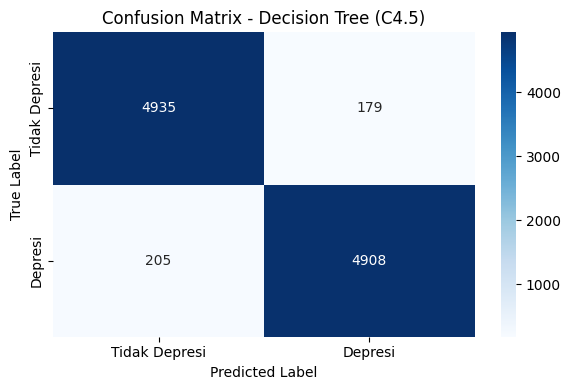

In [47]:
# Visualisasi
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Tidak Depresi", "Depresi"], yticklabels=["Tidak Depresi", "Depresi"])
plt.title("Confusion Matrix - Decision Tree (C4.5)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### **Train Dataset with SVM RBF Model**

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Buat dan latih model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model SVM menggunakan cross-validation
scores = cross_val_score(svm_model, X_train, y_train, cv=3, scoring='f1')

#Evaluasi Metrik
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Evaluasi
print("=== Evaluasi Model SVM ===")
print(f"Akurasi  : {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall   : {recall_svm:.4f}")
print(f"F1-Score : {f1_svm:.4f}")
print(classification_report(y_test, y_pred_svm, target_names=["Tidak Depresi", "Depresi"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

print(f"Cross-Validation F1-Score: {scores.mean():.4f} ± {scores.std():.4f}")


=== Evaluasi Model SVM ===
Akurasi  : 0.9826
Precision: 0.9785
Recall   : 0.9869
F1-Score : 0.9827
               precision    recall  f1-score   support

Tidak Depresi       0.99      0.98      0.98      5114
      Depresi       0.98      0.99      0.98      5113

     accuracy                           0.98     10227
    macro avg       0.98      0.98      0.98     10227
 weighted avg       0.98      0.98      0.98     10227

Confusion Matrix:
 [[5003  111]
 [  67 5046]]
Cross-Validation F1-Score: 0.9499 ± 0.0005


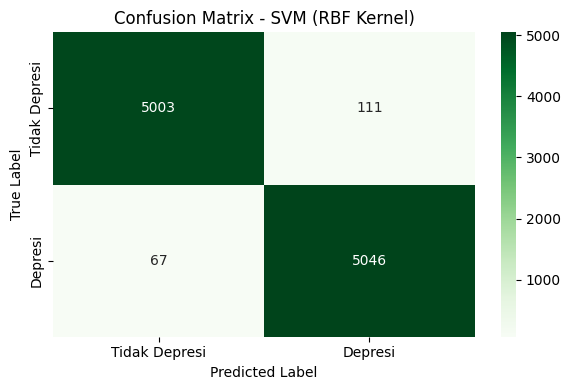

In [49]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=["Tidak Depresi", "Depresi"], yticklabels=["Tidak Depresi", "Depresi"])
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### **Tuning Hyperparameter SVM (GridSearch)**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definisikan parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Buat GridSearchCV
grid_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_svm.fit(X_train, y_train)
scores = cross_val_score(grid_svm.best_estimator_, X_train, y_train, cv=5, scoring='f1')

# Evaluasi model terbaik
best_svm = grid_svm.best_estimator_
y_pred = best_svm.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Best Params:", grid_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_svm.best_score_)
print(classification_report(y_test, y_pred, target_names=["Tidak Depresi", "Depresi"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print(f"Cross-Validation F1-Score (SVM with Hyperparameter Tuning): {scores.mean():.4f} ± {scores.std():.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 1.0
               precision    recall  f1-score   support

Tidak Depresi       1.00      1.00      1.00      5114
      Depresi       1.00      1.00      1.00      5113

     accuracy                           1.00     10227
    macro avg       1.00      1.00      1.00     10227
 weighted avg       1.00      1.00      1.00     10227

Confusion Matrix:
 [[5114    0]
 [   0 5113]]
Cross-Validation F1-Score (SVM with Hyperparameter Tuning): 1.0000 ± 0.0000


## **Modelling Evaluation**

### **Evaluation of Model Result**